In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
%matplotlib inline

In [3]:
os.chdir('c:\\Users\\dsaldias\\Desktop\\Costo fabril\\ENEA')
df = pd.read_excel('Analisis_procesos_PV.xlsx',sheet_name='Base_datos')
df.columns

c:\Users\dsaldias\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


Index(['Codigo producto terminado', 'Descripcion producto terminado', 'Linea',
       'Modulo de linea', 'Codigo materia prima', 'Descripcion materia prima',
       'Muestra', 'UMI', 'Receta', 'Fecha muestra', 'Filtro'],
      dtype='object')

In [4]:
df['PT y fecha'] = df['Descripcion producto terminado']+" - "+df['Fecha muestra'].dt.strftime('%d/%m/%Y')
df.columns

Index(['Codigo producto terminado', 'Descripcion producto terminado', 'Linea',
       'Modulo de linea', 'Codigo materia prima', 'Descripcion materia prima',
       'Muestra', 'UMI', 'Receta', 'Fecha muestra', 'Filtro', 'PT y fecha'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Codigo producto terminado       2557 non-null   int64         
 1   Descripcion producto terminado  2557 non-null   object        
 2   Linea                           2557 non-null   object        
 3   Modulo de linea                 2557 non-null   object        
 4   Codigo materia prima            2557 non-null   int64         
 5   Descripcion materia prima       2557 non-null   object        
 6   Muestra                         2557 non-null   int64         
 7   UMI                             2557 non-null   object        
 8   Receta                          2557 non-null   int64         
 9   Fecha muestra                   2557 non-null   datetime64[ns]
 10  Filtro                          2557 non-null   object        
 11  PT y

In [6]:
os.getcwd()

'c:\\Users\\dsaldias\\Desktop\\Costo fabril\\ENEA'

C:\Users\dsaldias\AppData\Local\Temp\ipykernel_51500\3357815504.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(20,12))


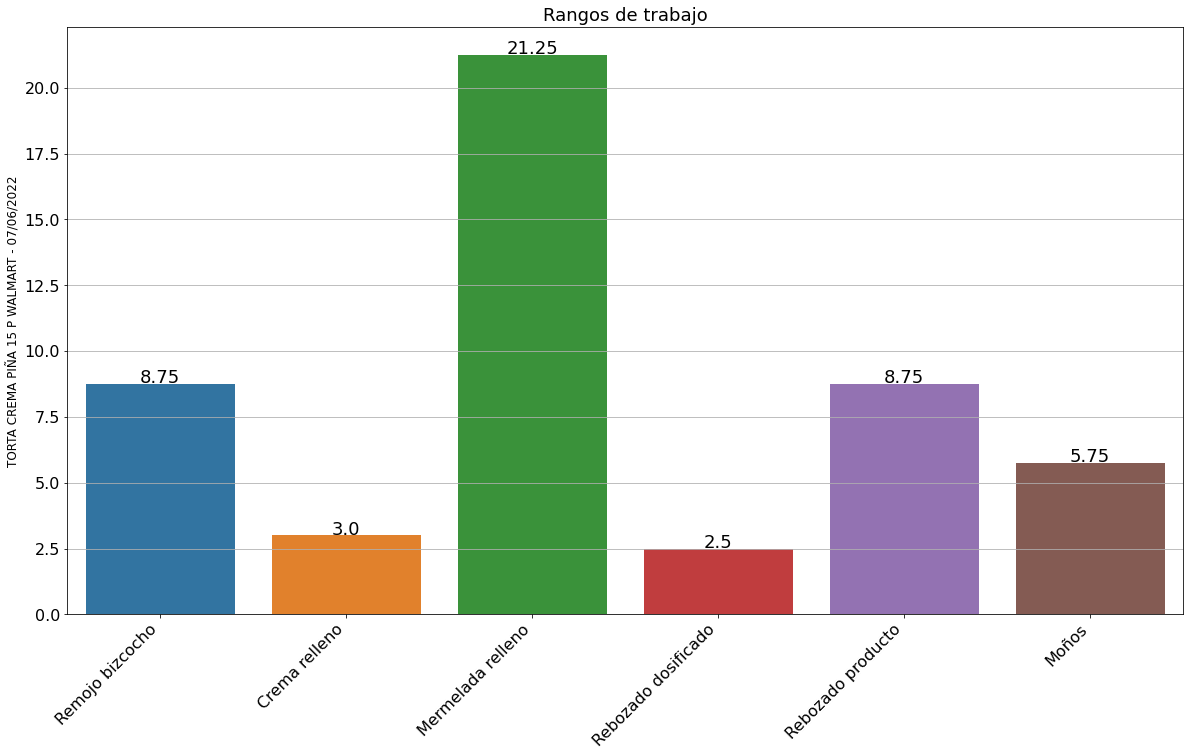

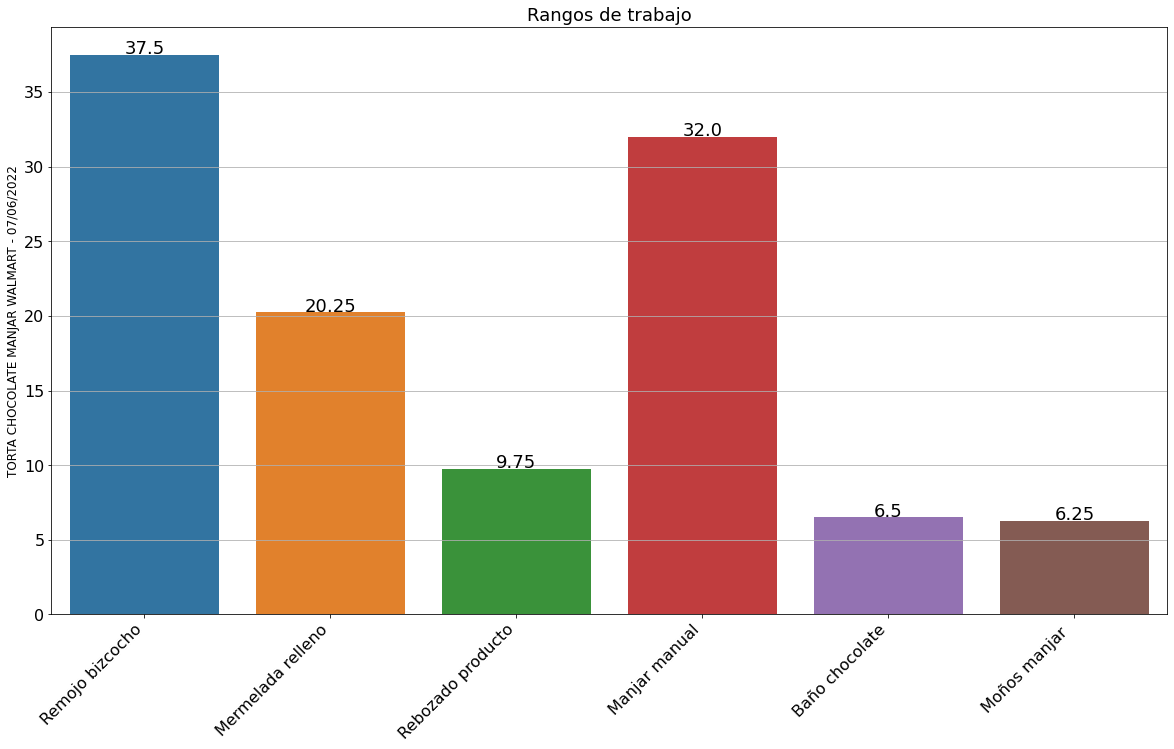

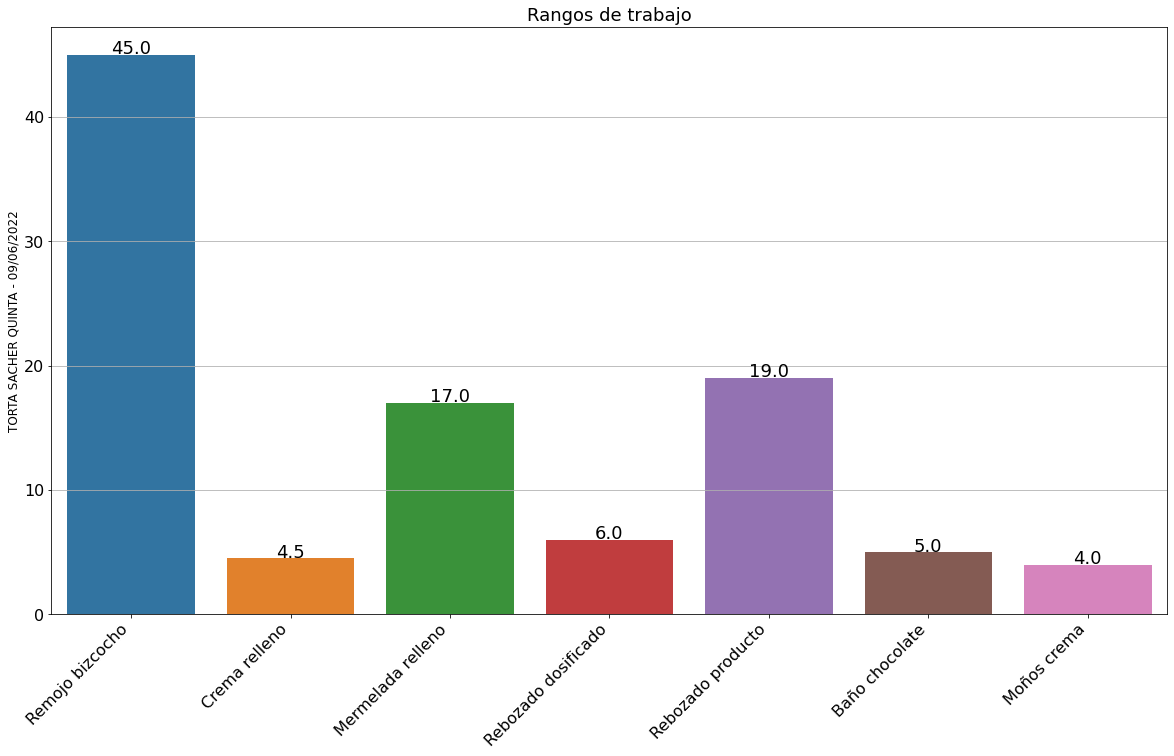

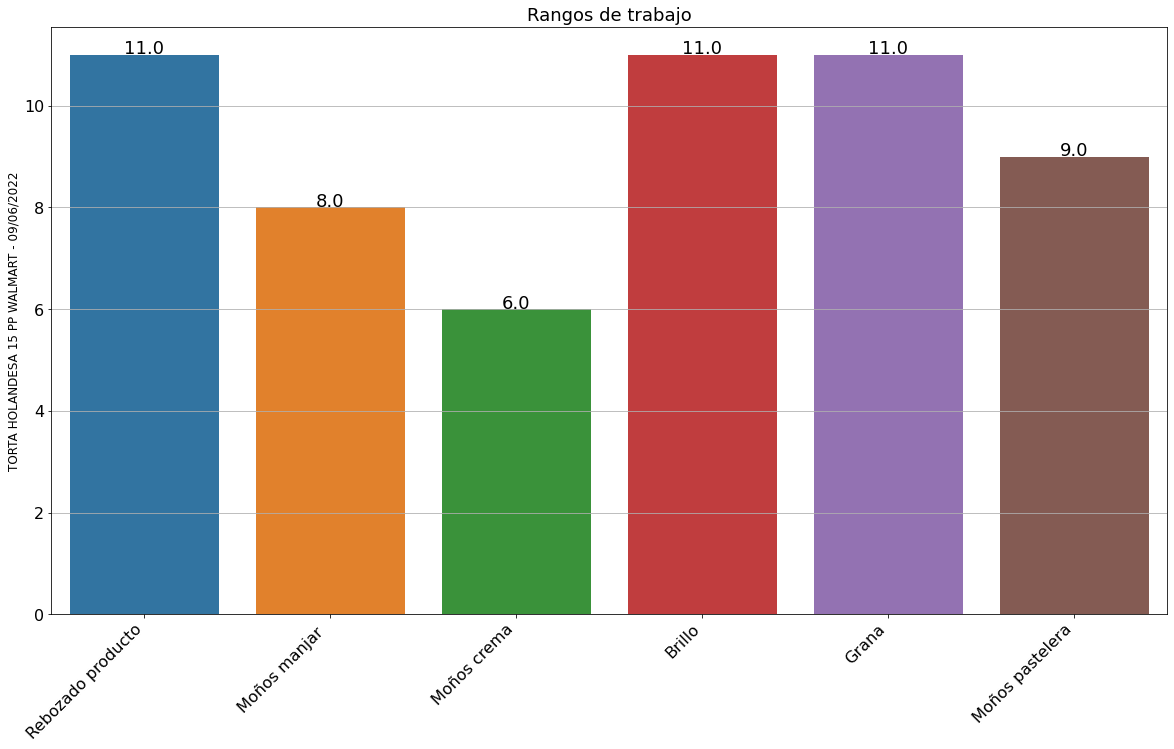

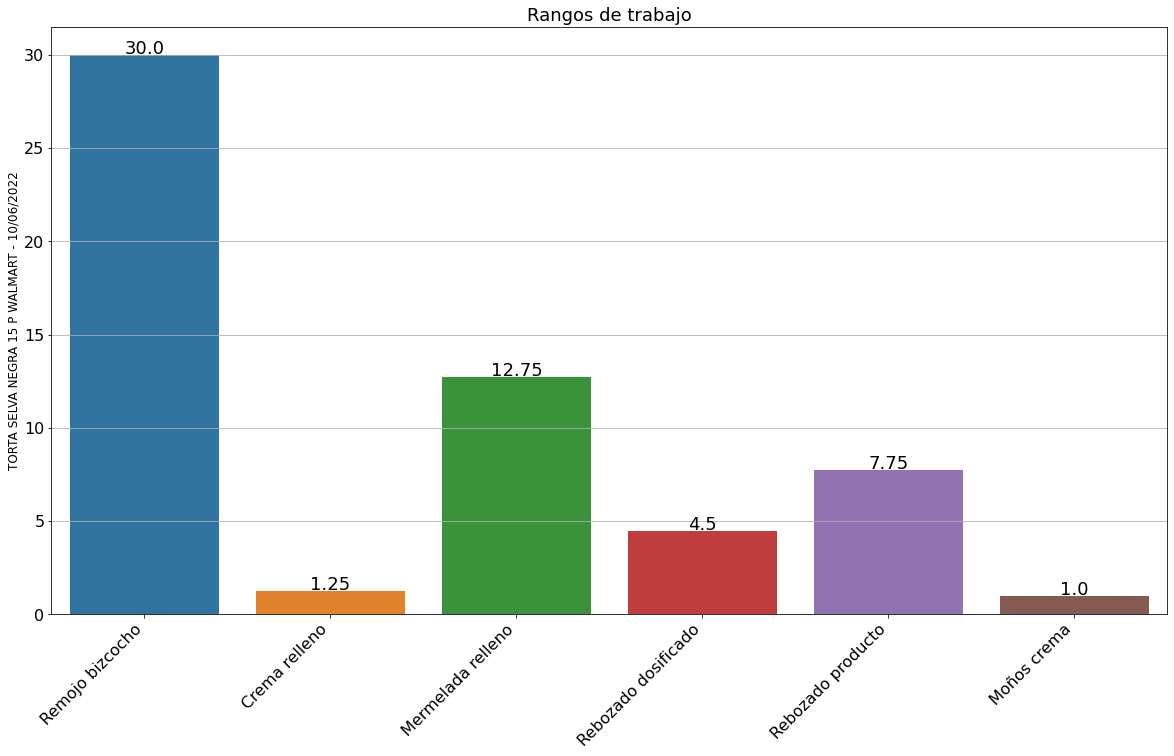

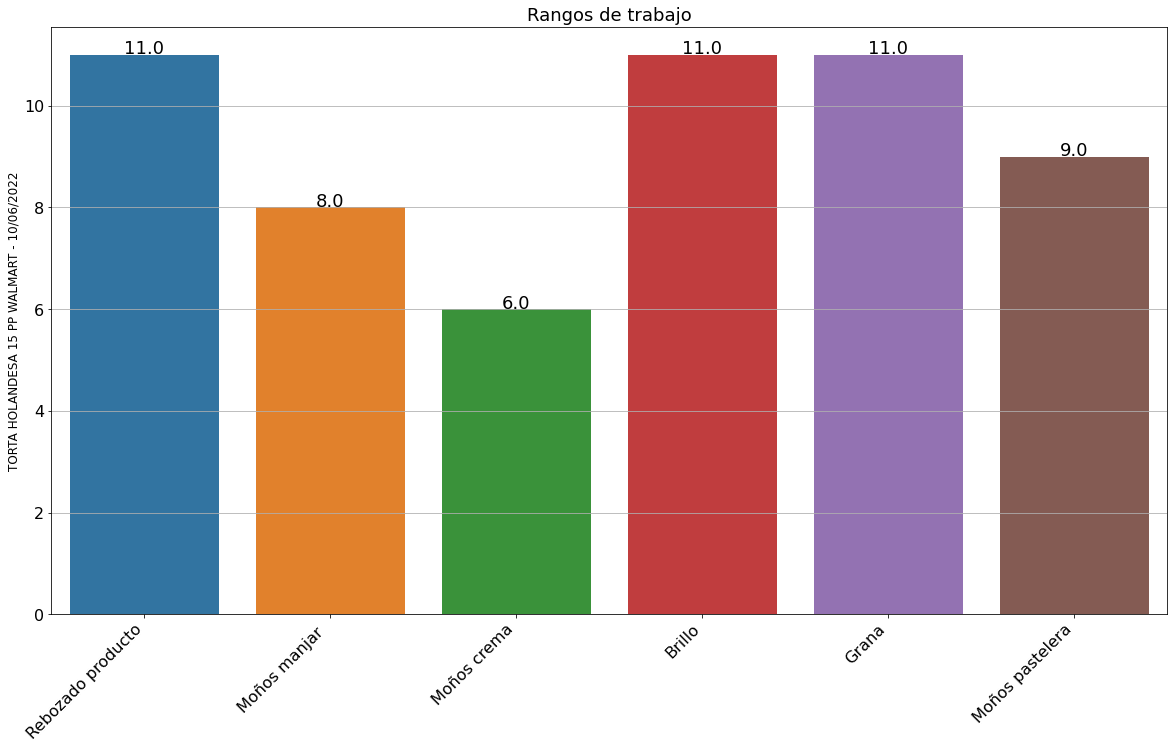

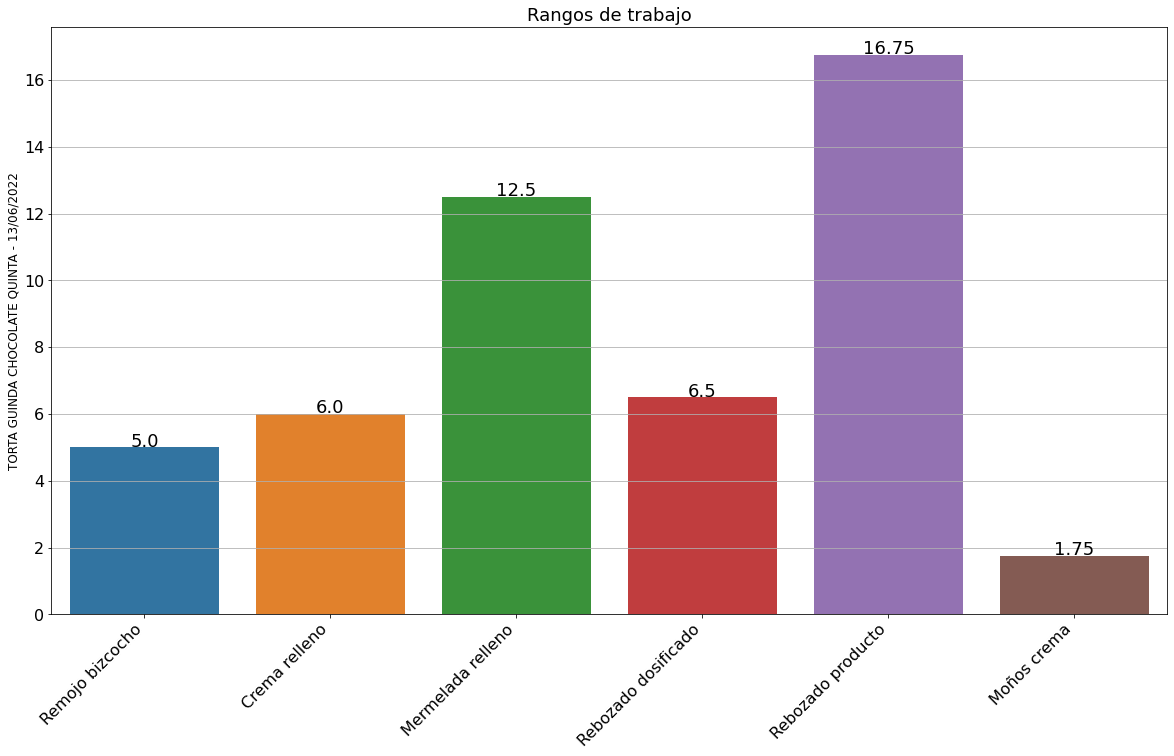

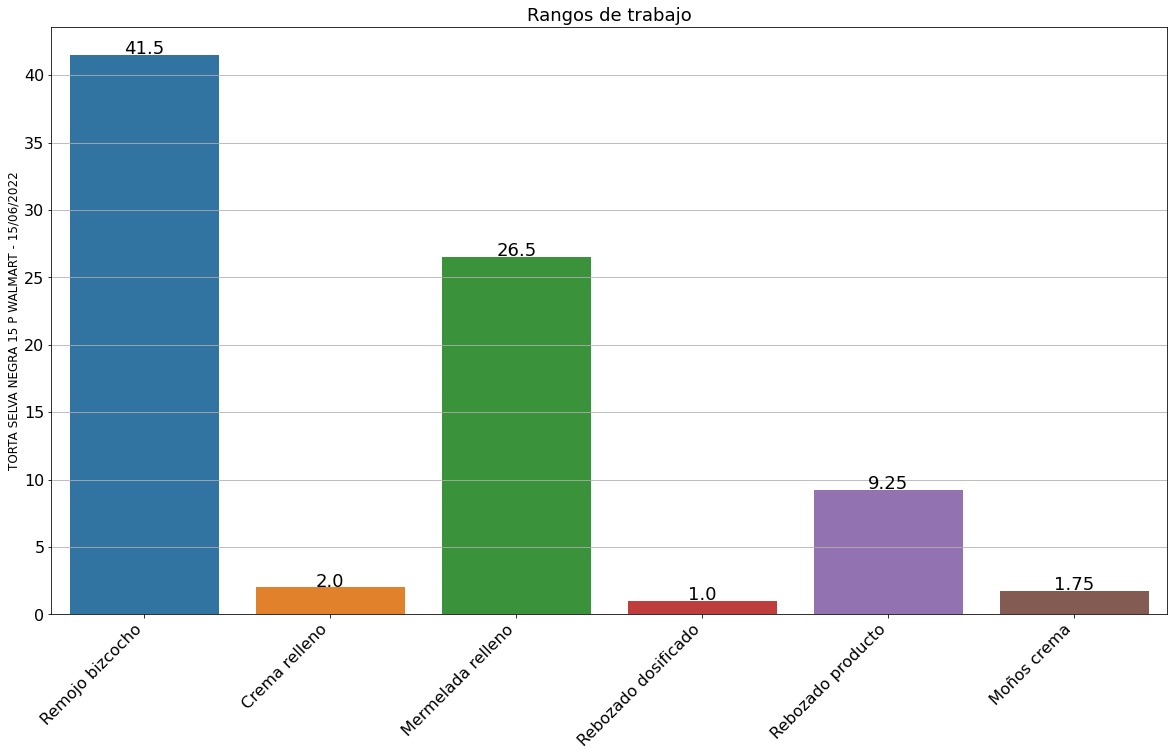

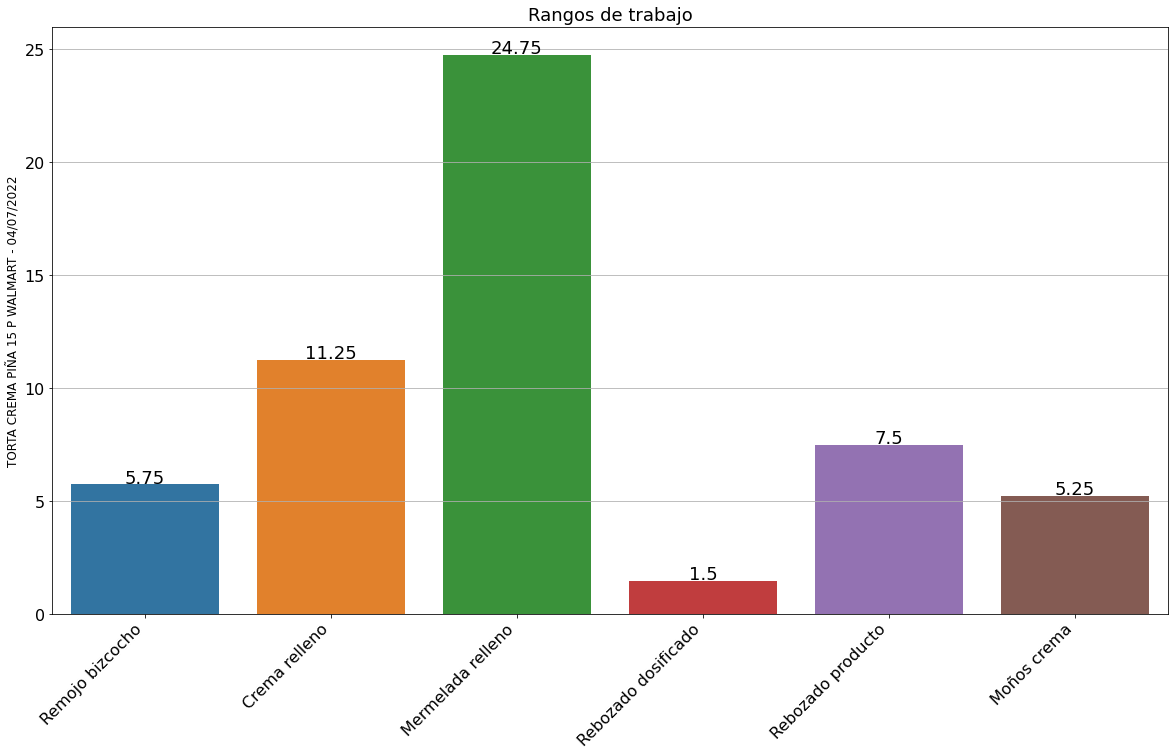

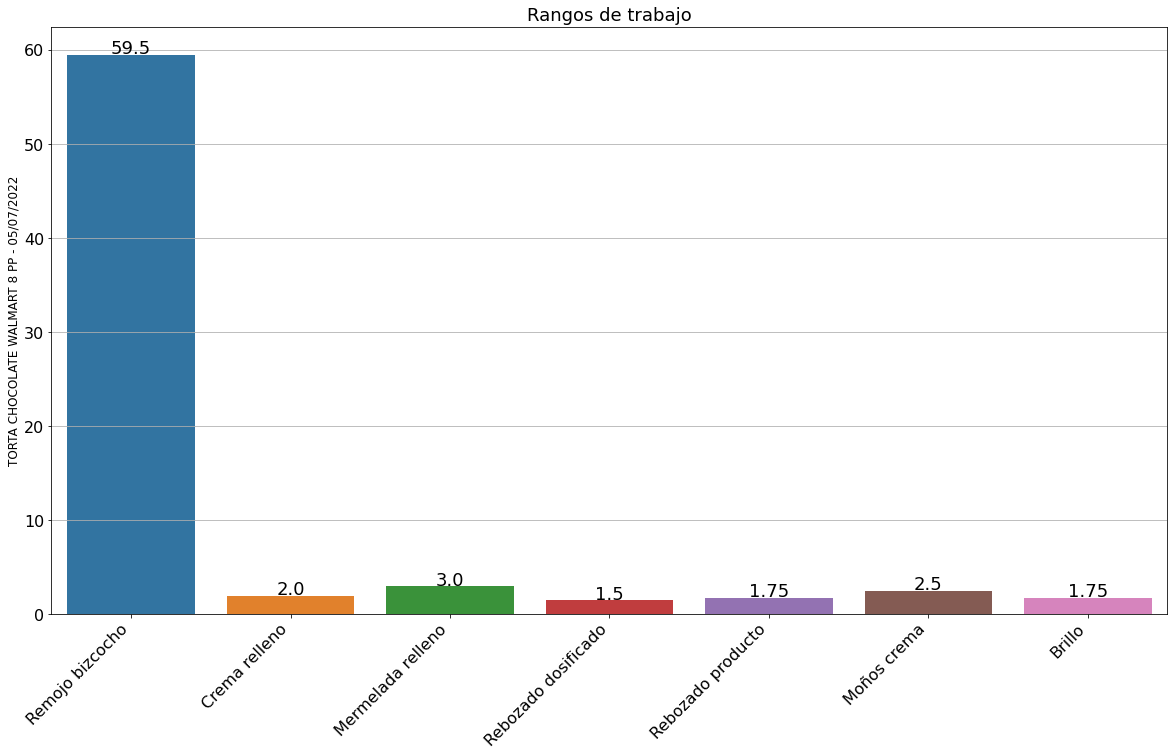

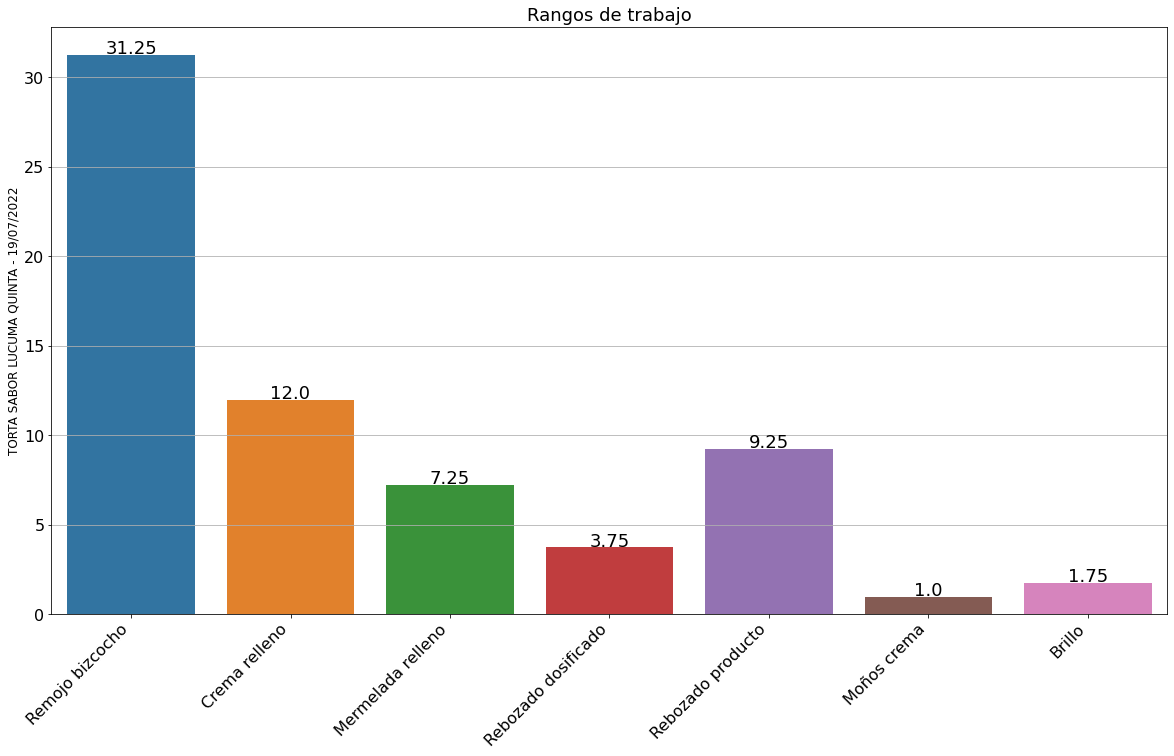

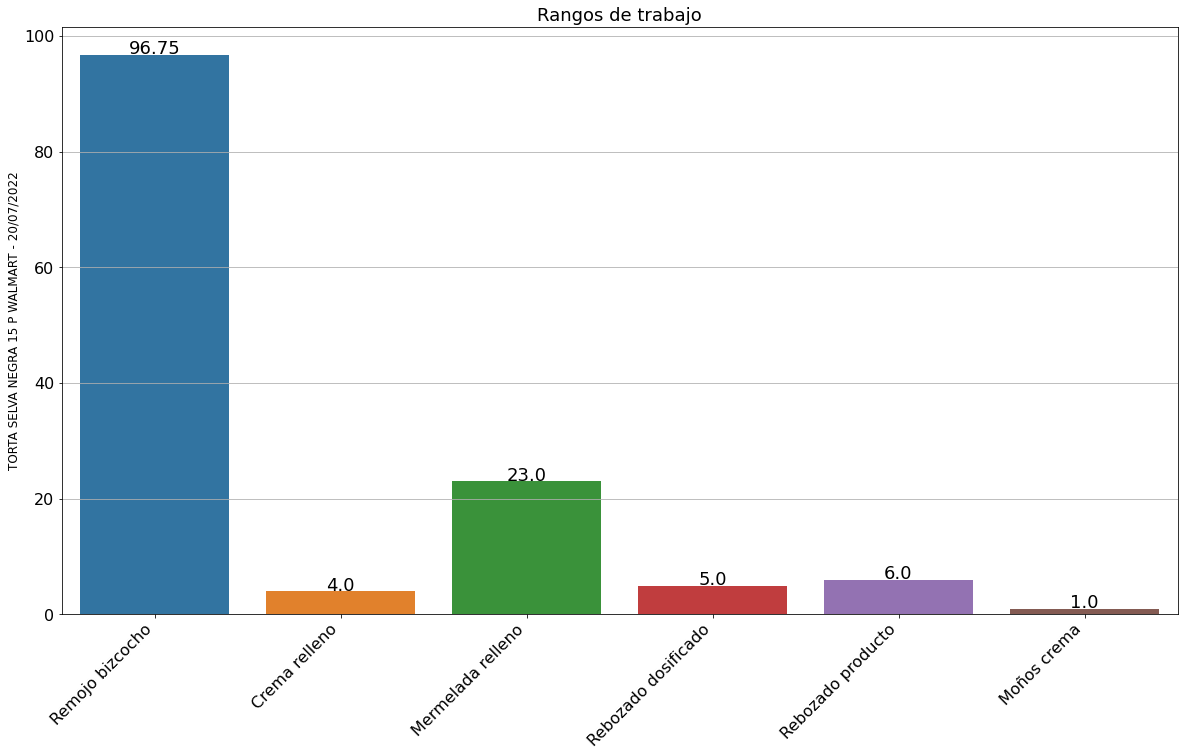

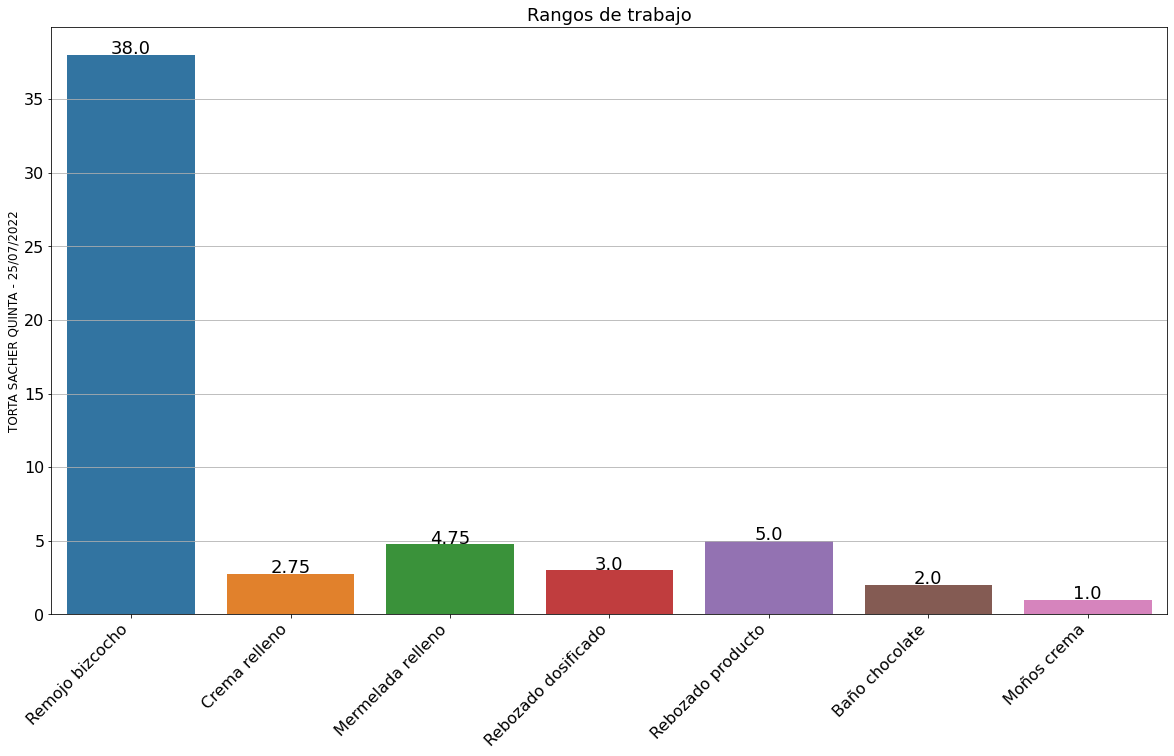

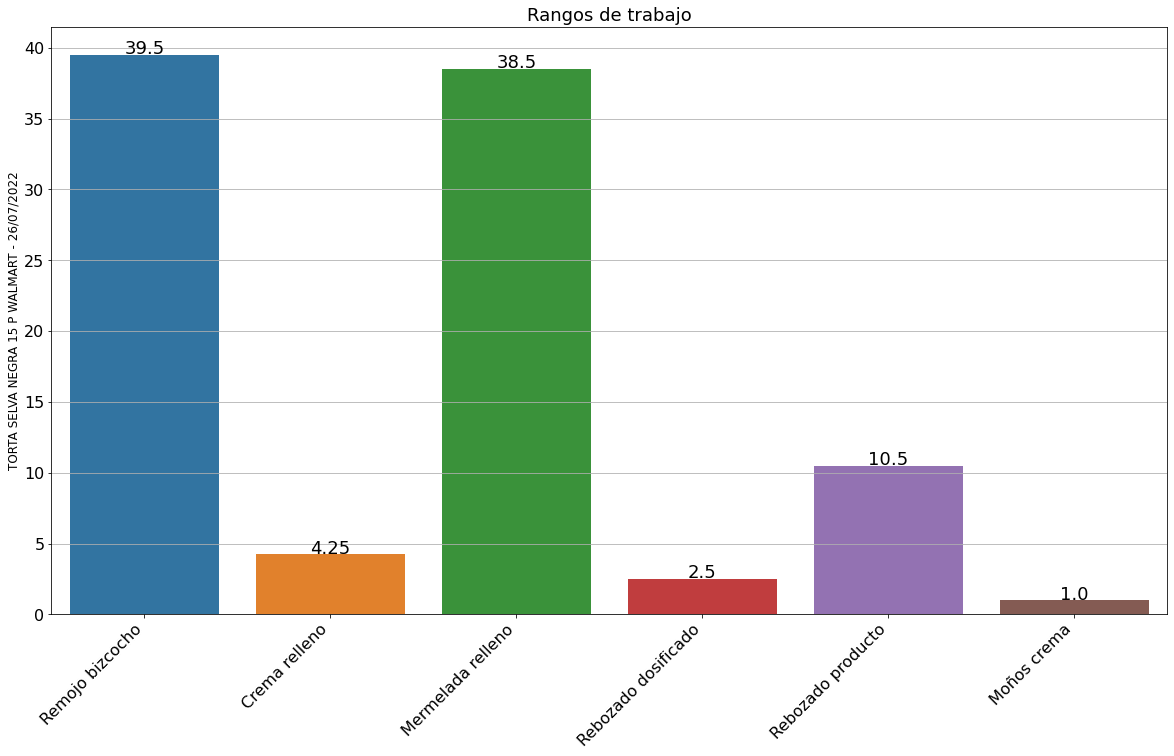

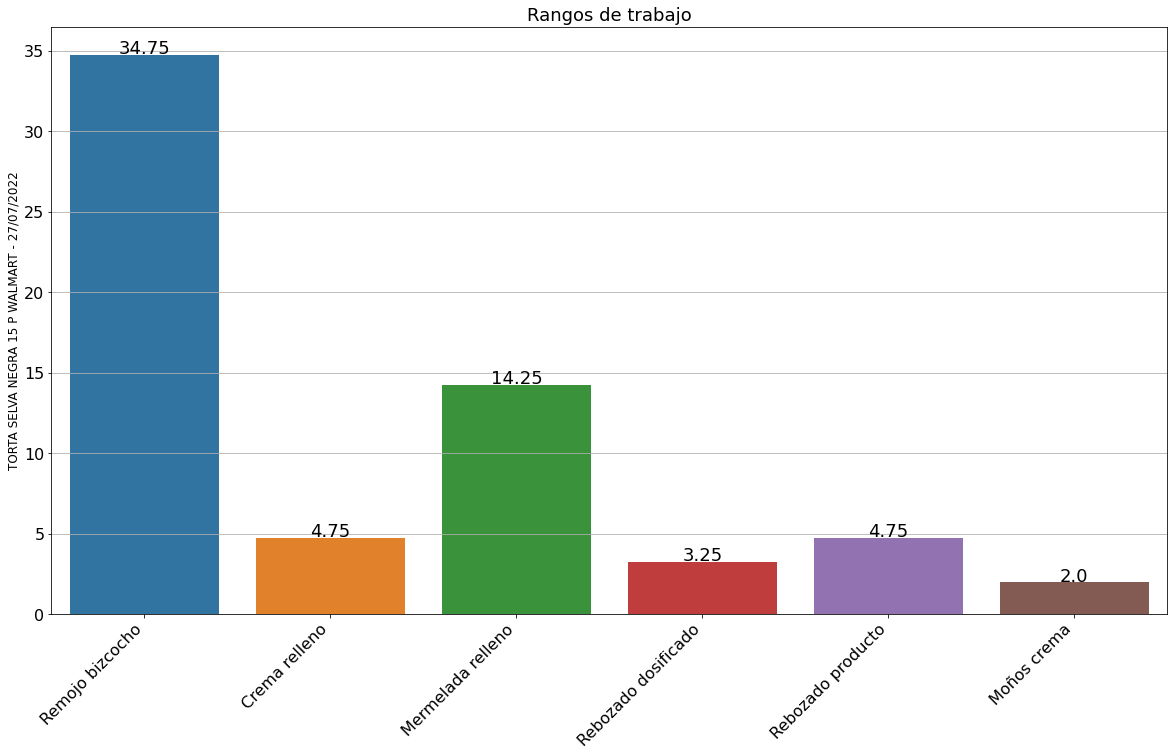

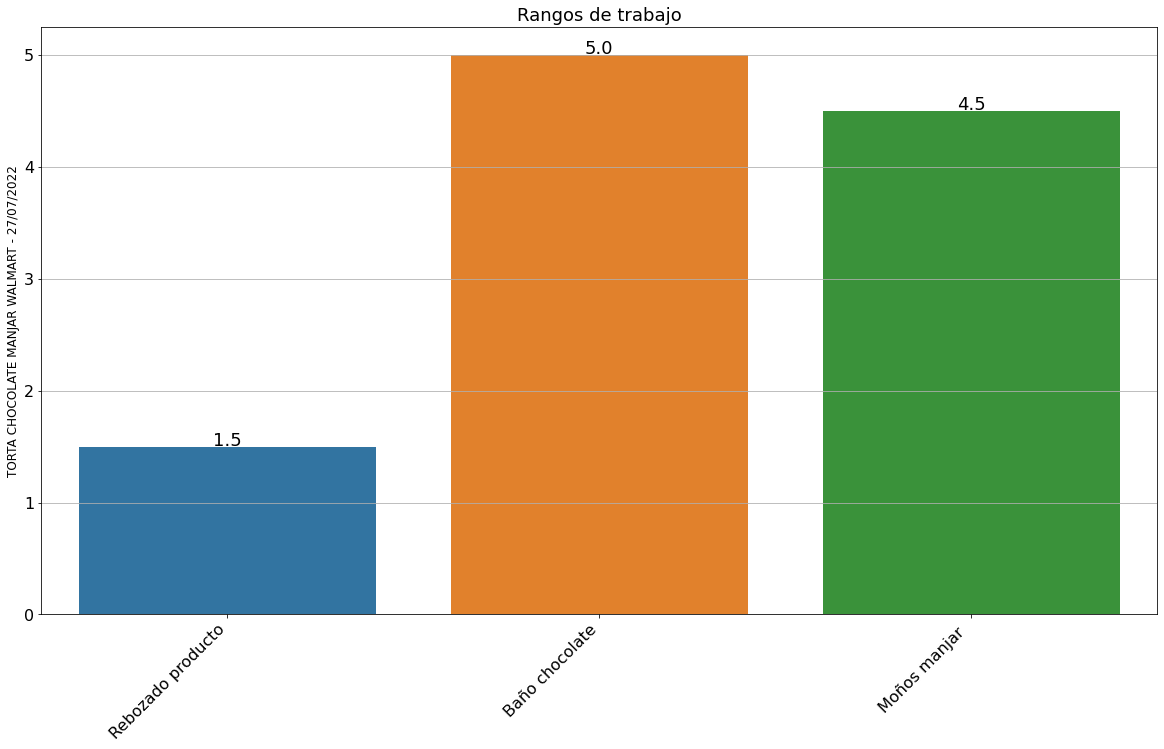

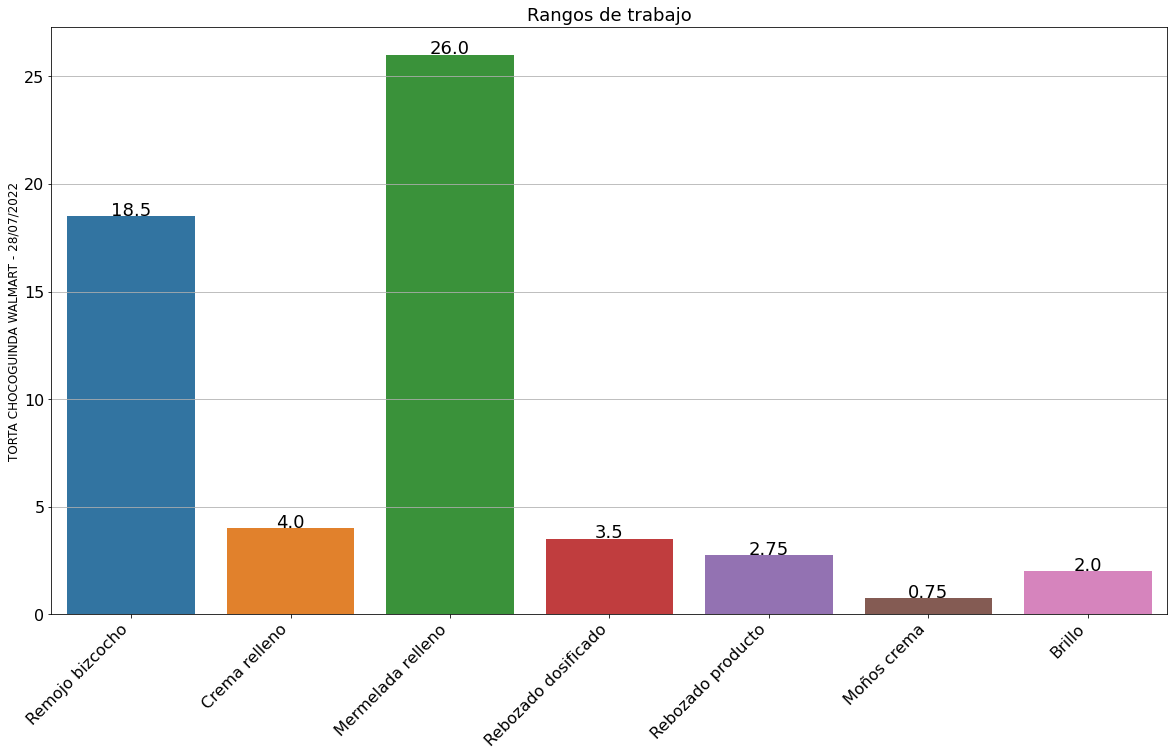

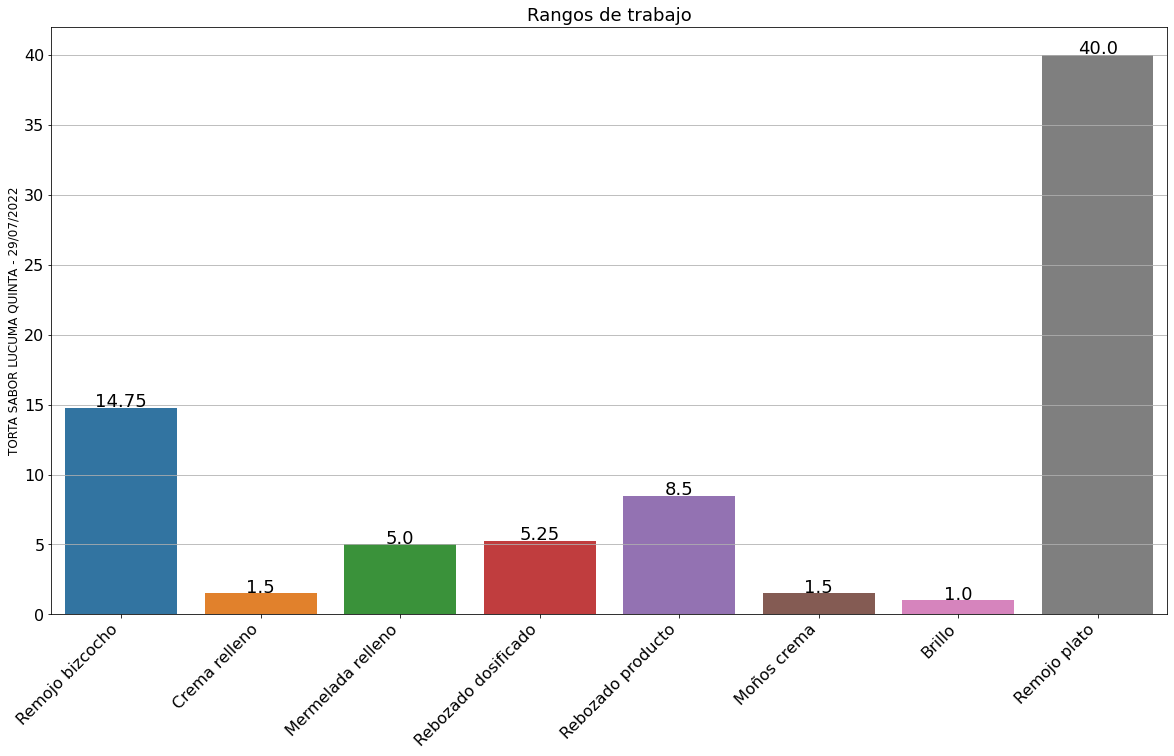

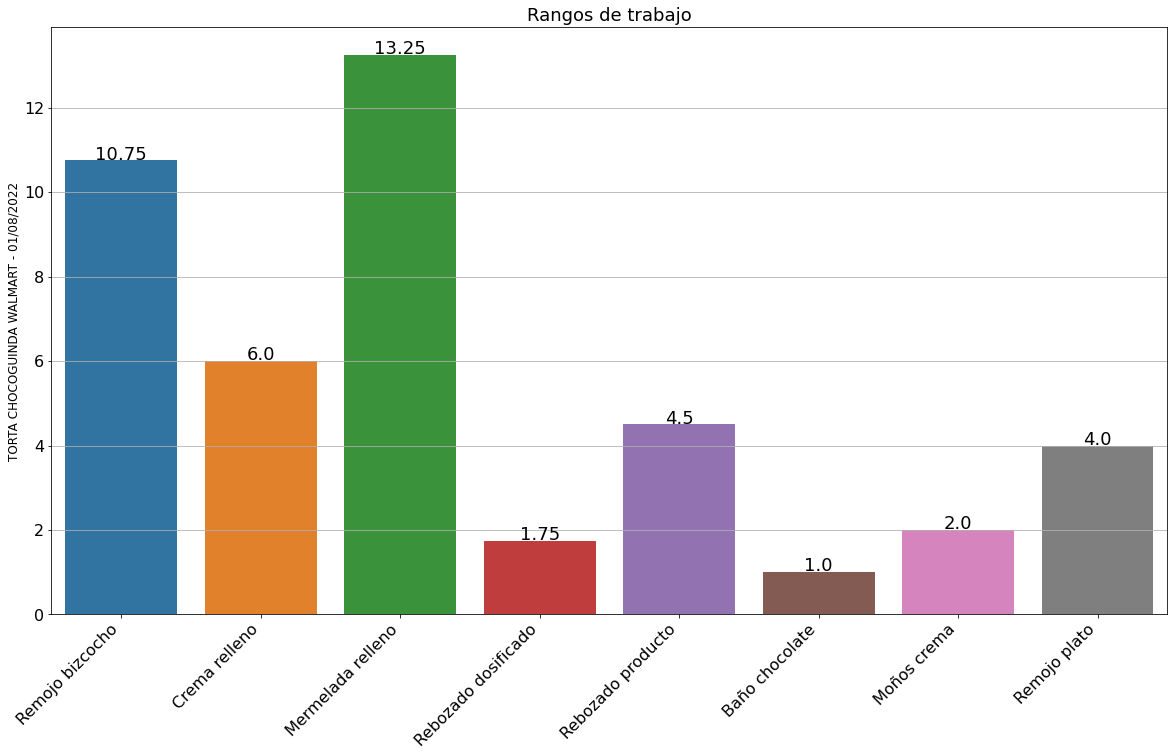

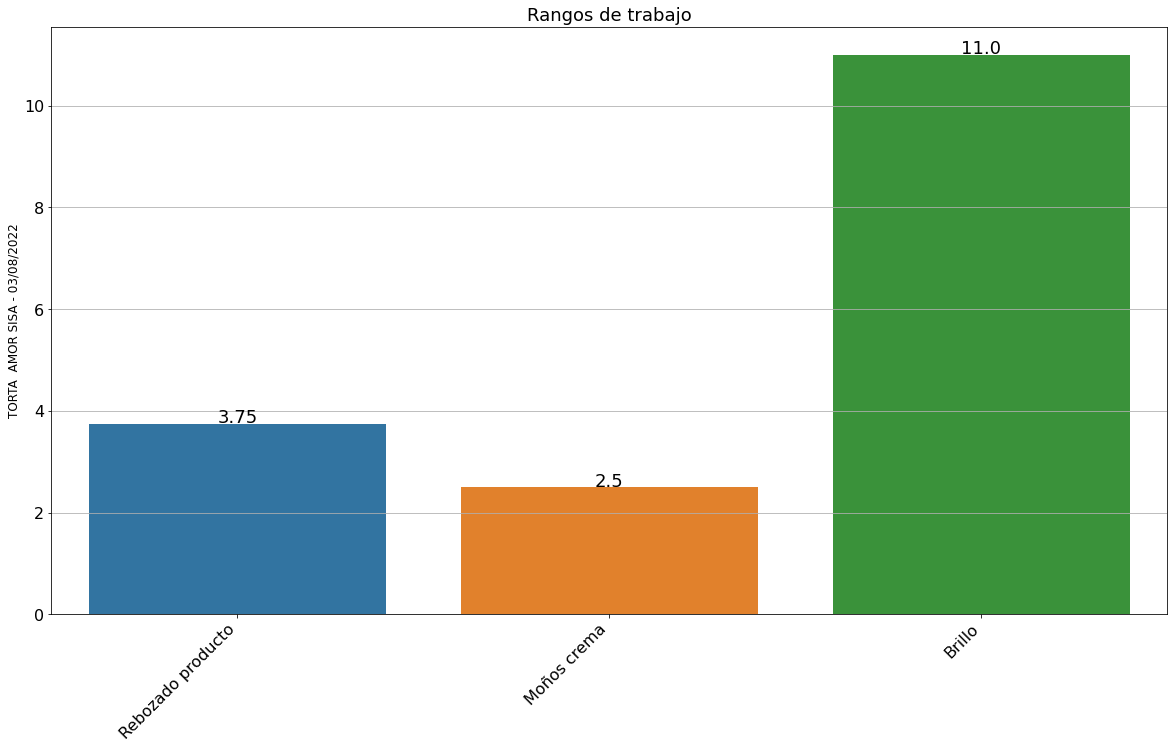

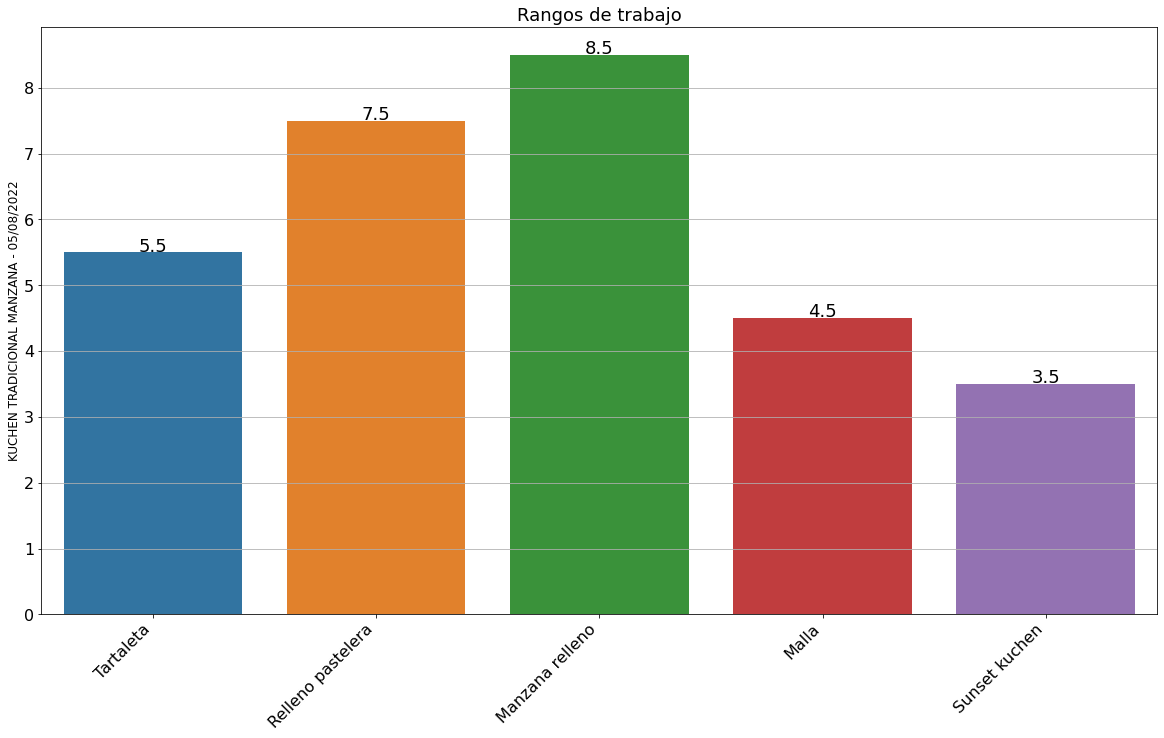

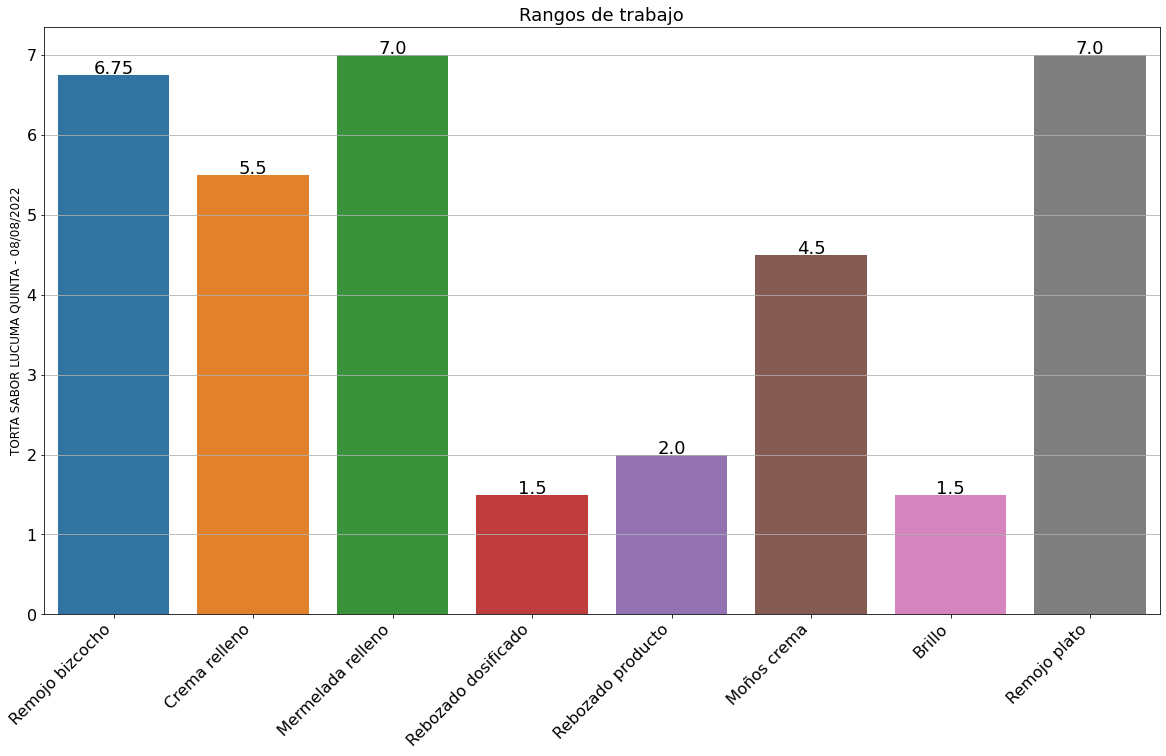

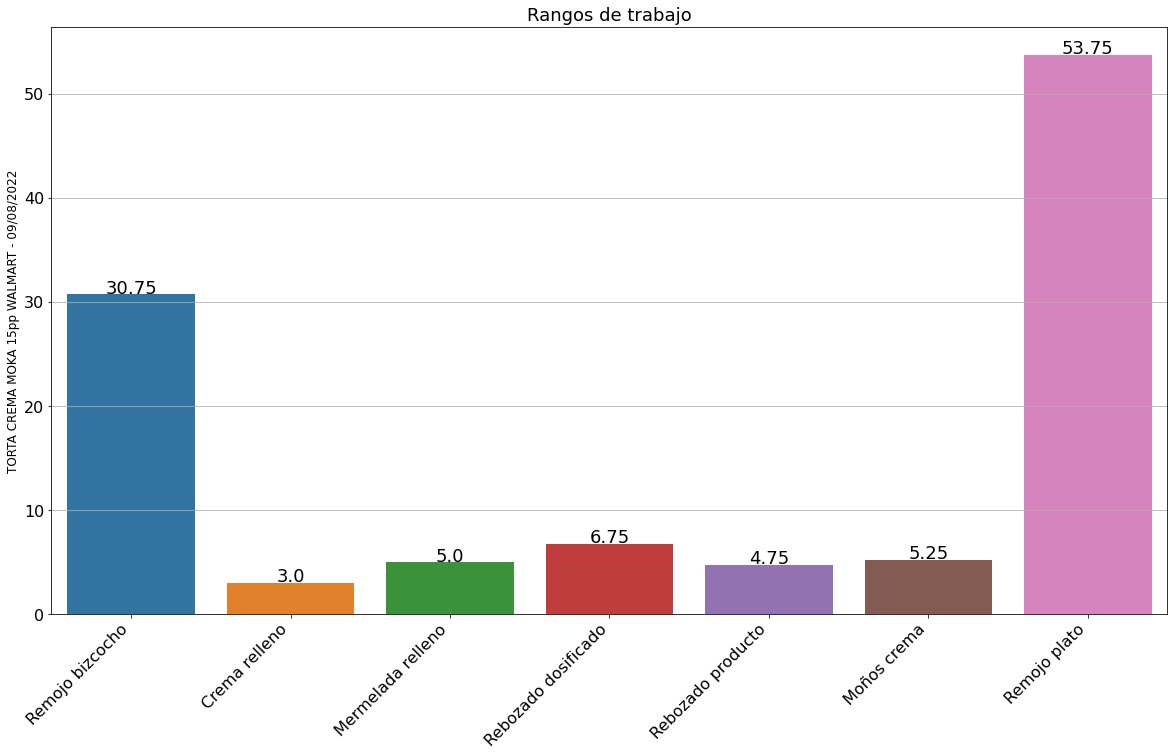

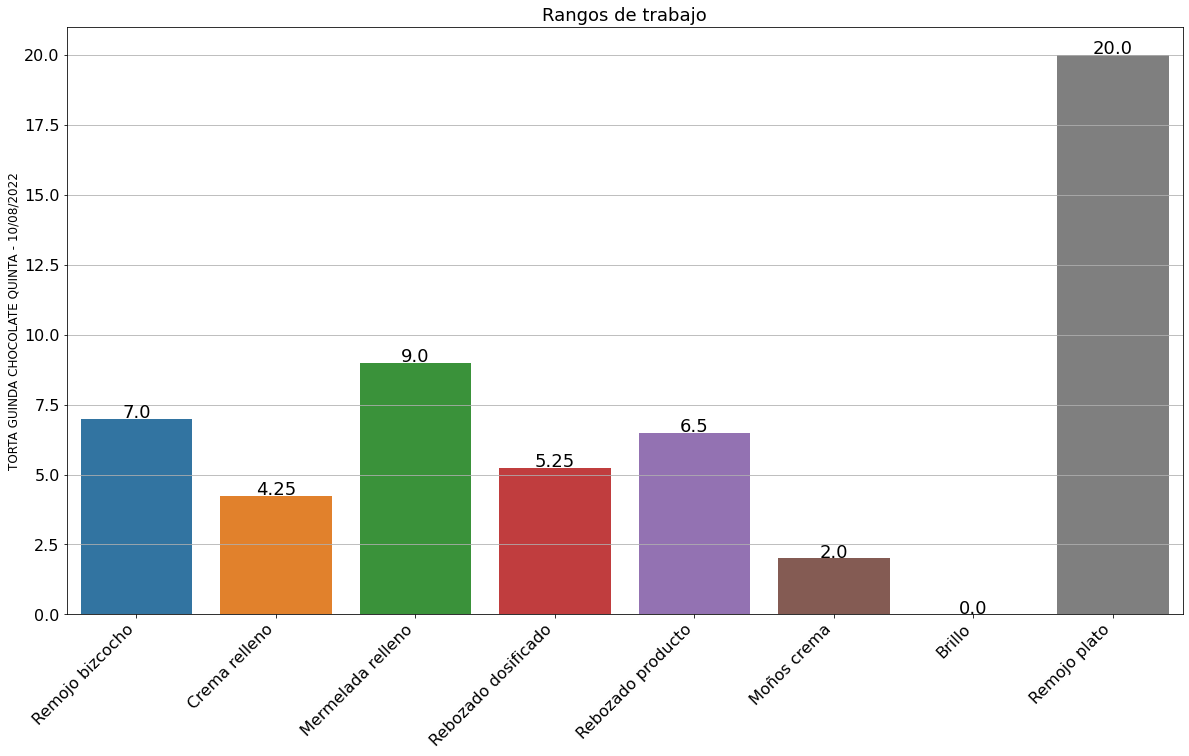

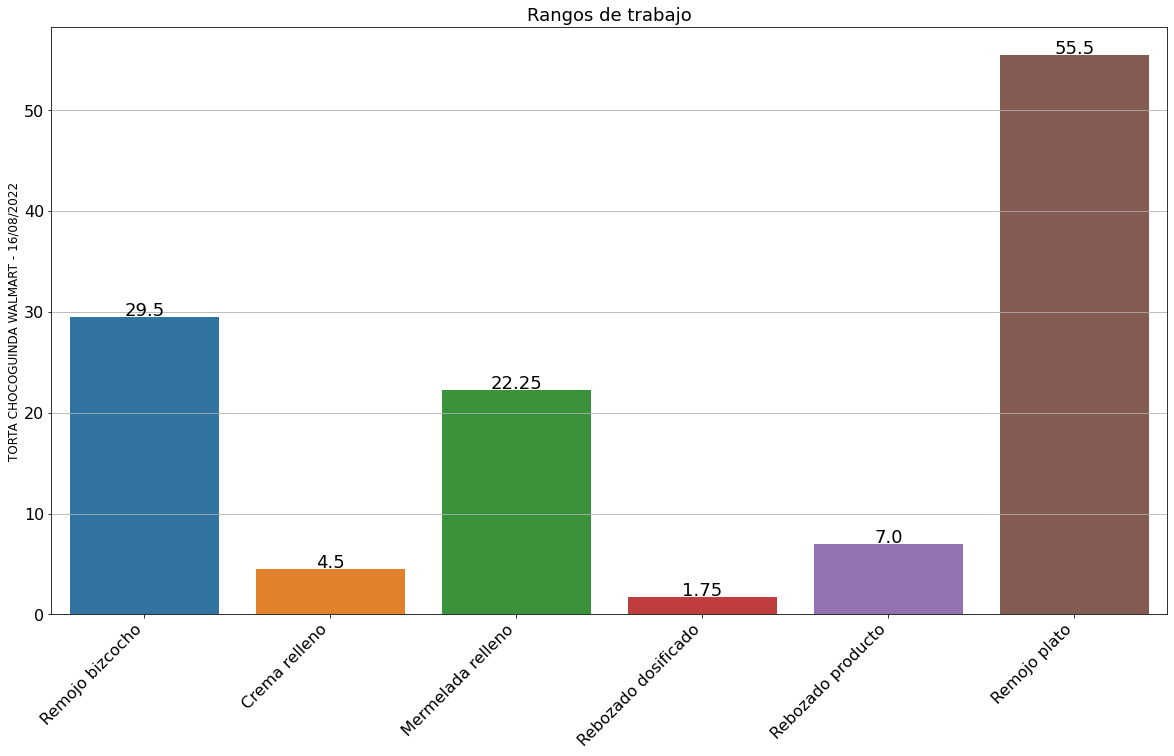

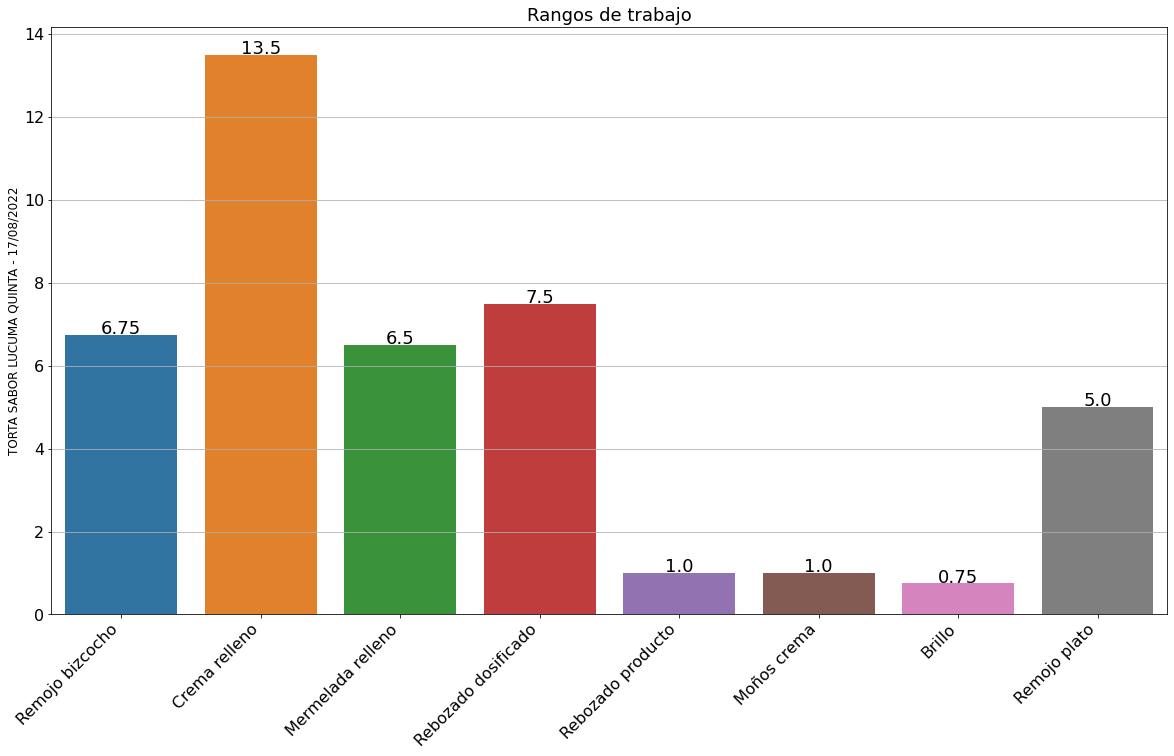

In [7]:
PT = df['PT y fecha'].drop_duplicates()
CF2 = {}
for pt in PT:
    CF = {}
    df2 = df[df['PT y fecha']==pt]
    ML = df2['Filtro'].drop_duplicates() #cambiar a Filtro
    for ml in ML:
        df3 = df2[df2['Filtro']==ml] #Cambiar a filtro
        q3, q1 = np.percentile(df3.Muestra,[75,25])
        iqr = q3 - q1
        CF[ml] = iqr
    CF2[pt] = CF
df_1 = pd.DataFrame(CF2)
row_names_columns = df_1.columns.values
mues = 0
for rnc in row_names_columns:
    df_2 = df_1[rnc]
    df_3 = df_2.dropna()
    row_names_filas = df_3.index.values
    fig, ax = plt.subplots(figsize=(20,12))
    ax.set_title('Rangos de trabajo',size=18)
    ax.set_xlabel('',size=18)
    ax.set_ylabel('',size=12)
    ax.tick_params(axis='x',labelsize=16)
    ax.tick_params(axis='y',labelsize=16)
    ax.grid()
    plot = sns.barplot(x=row_names_filas,y=df_3)
    fig.autofmt_xdate(rotation=45)
    for i in plot.patches:
        #print(i)
        plot.annotate(i.get_height(),(i.get_x()+i.get_width()/2,i.get_height()),
        ha='center',va='baseline',fontsize=18,color='black',
        xytext=(0,1),textcoords='offset points')
    mues += 1
    os.chdir('c:\\Users\\dsaldias\\Desktop\\Sobreconsumo\\Veronica Sanchez\\Graficos_CF')
    plt.savefig('Muestra'+str(mues)+'.jpg',format='jpg')

C:\Users\dsaldias\AppData\Local\Temp\ipykernel_51500\1980093604.py:18: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_51500\1980093604.py:18: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_51500\1980093604.py:18: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_51500\1980093604.py:18:

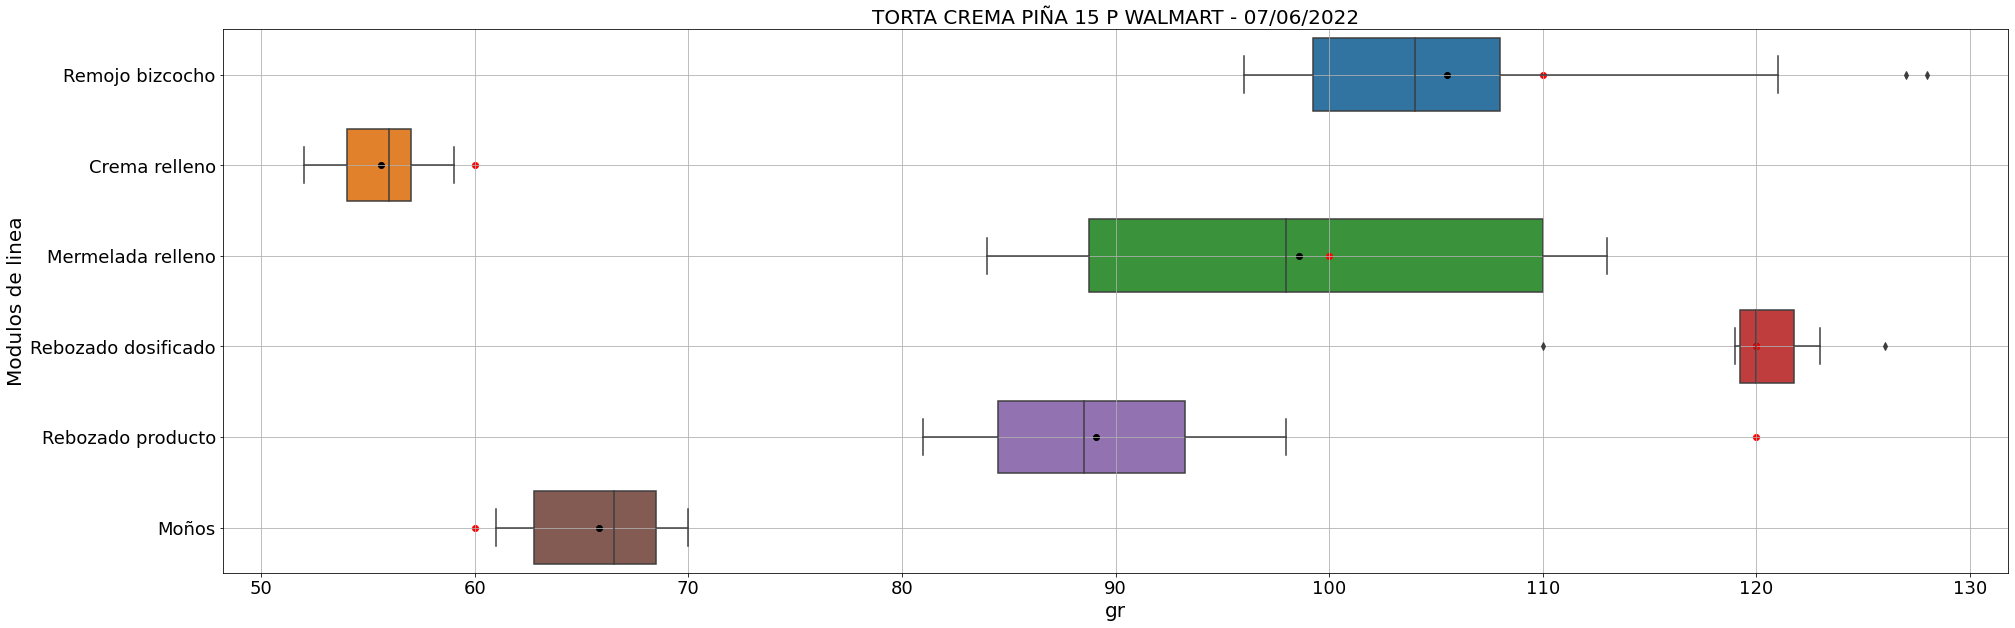

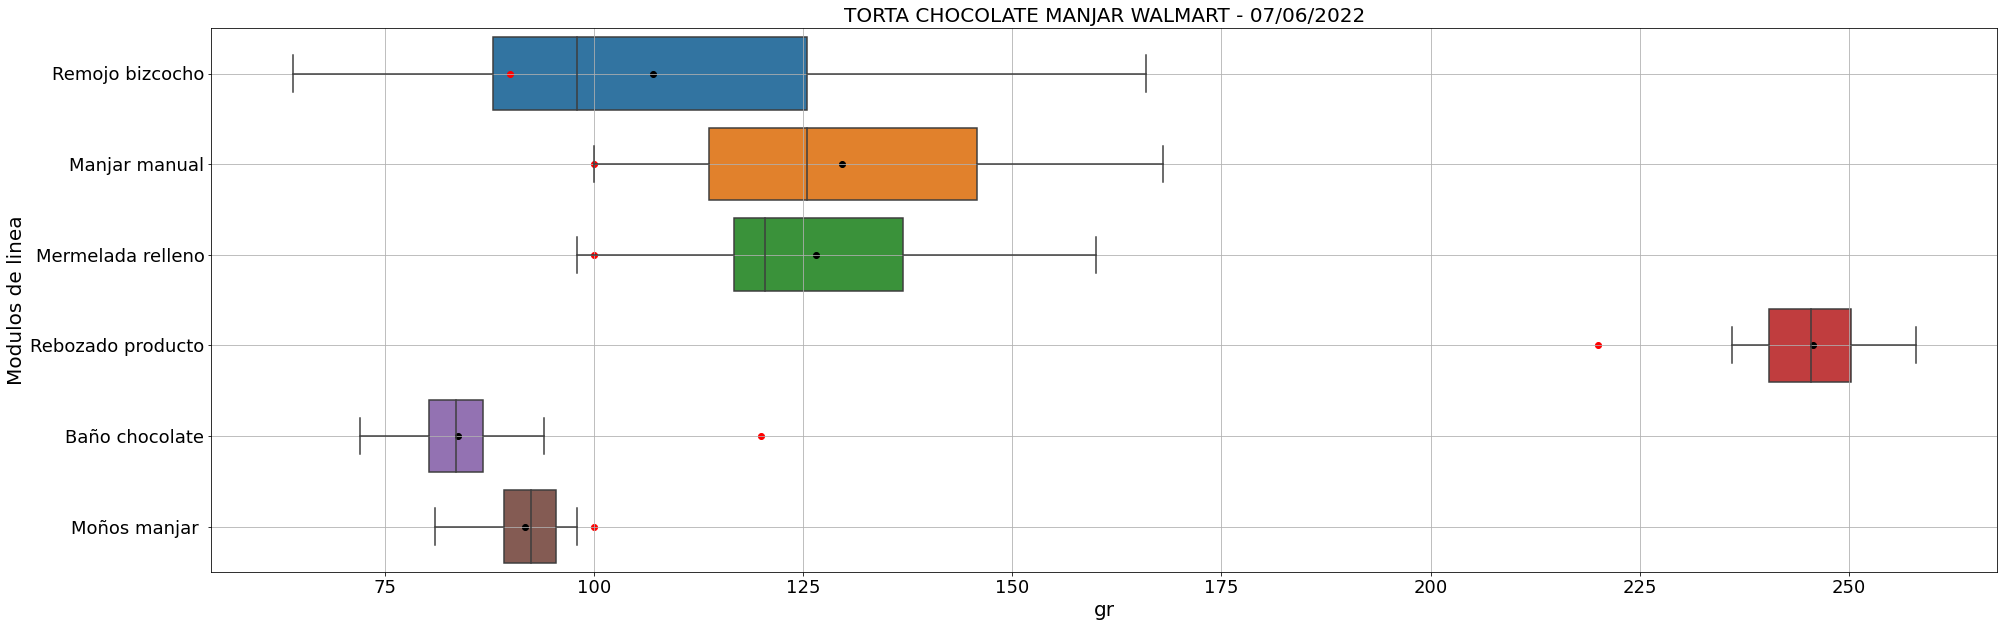

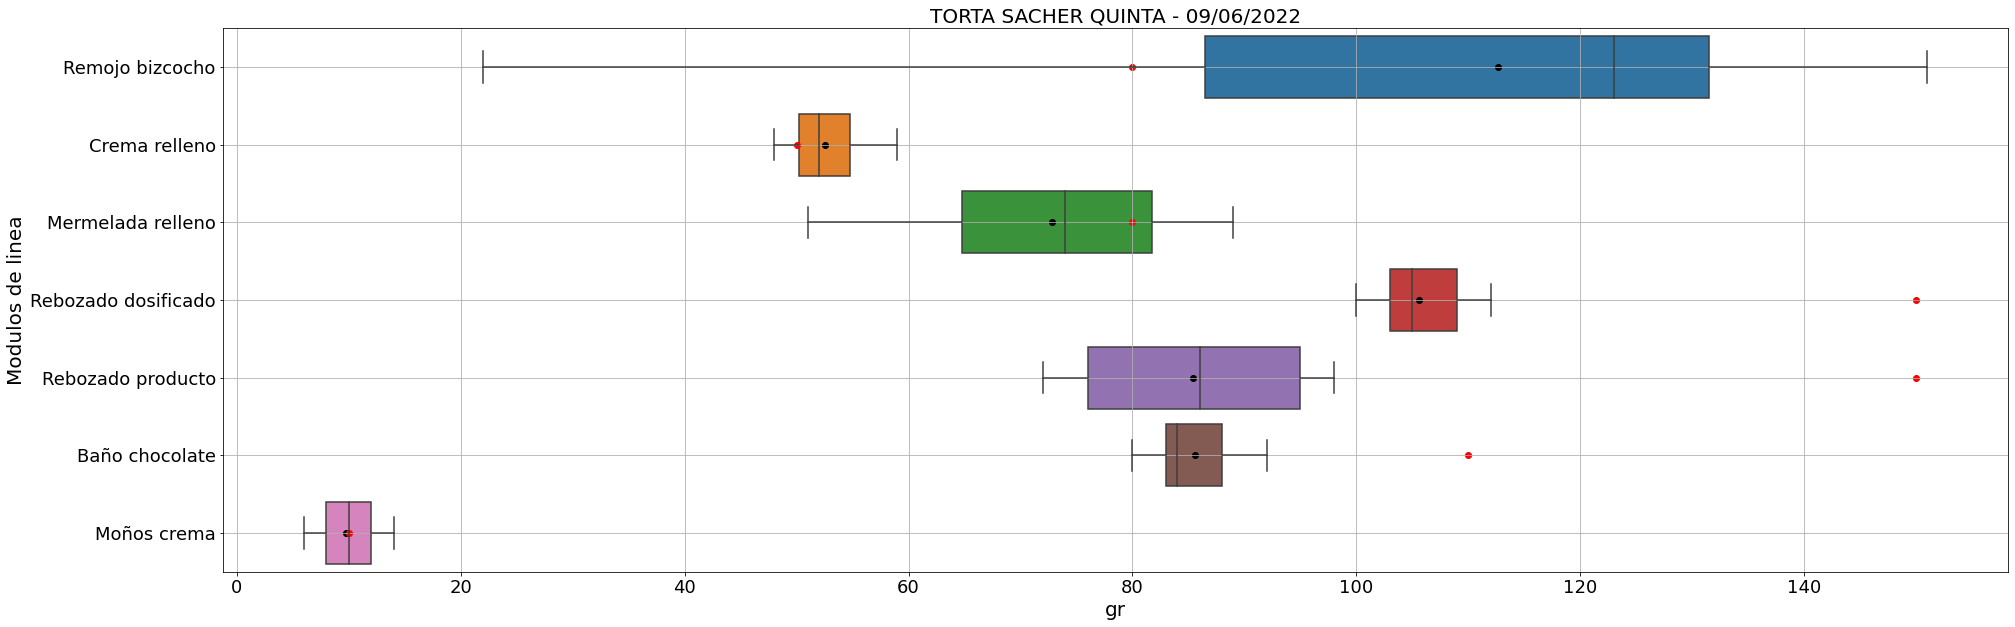

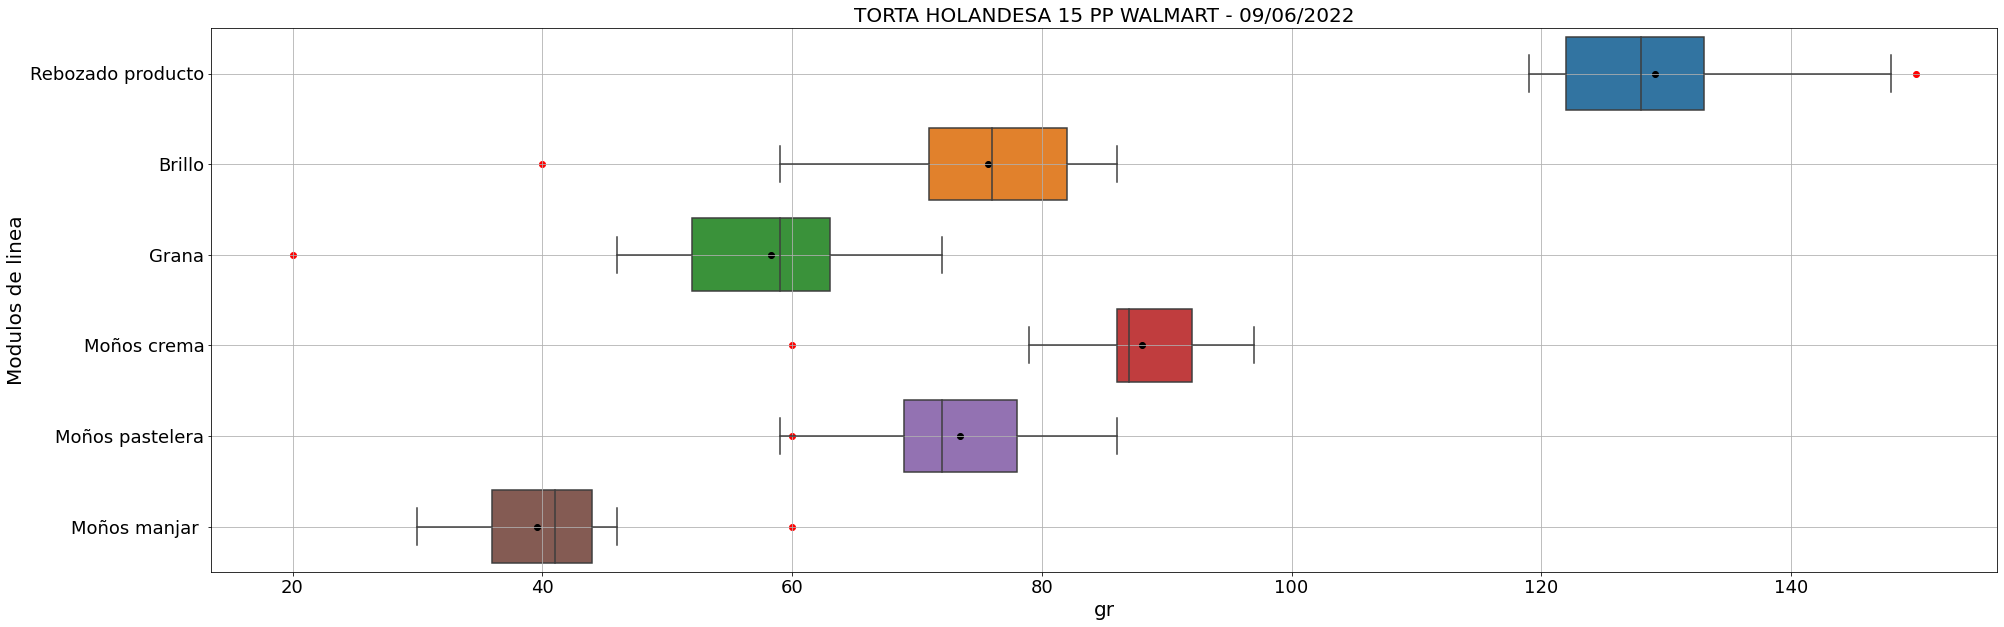

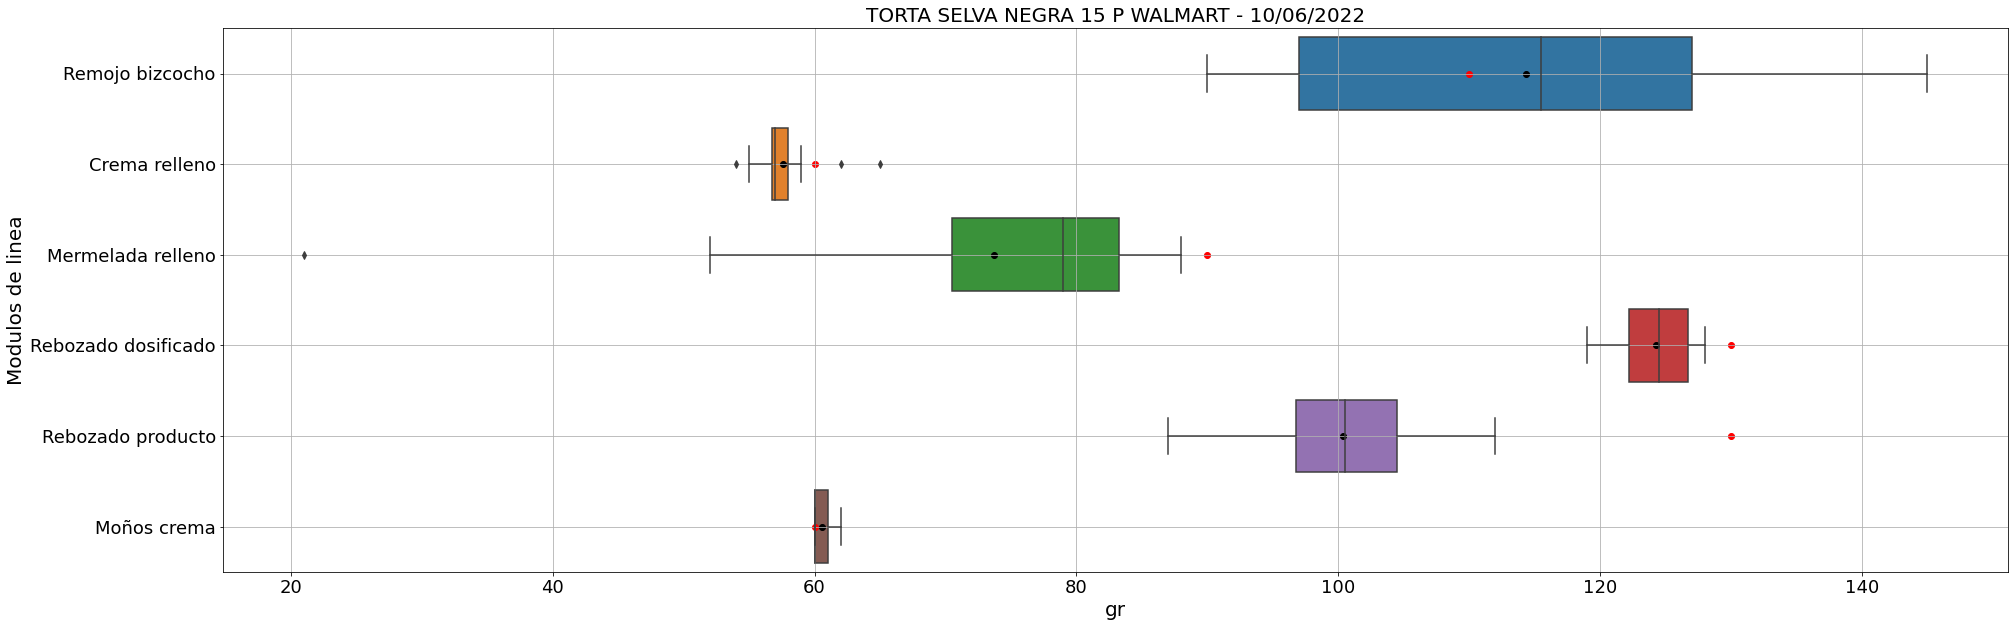

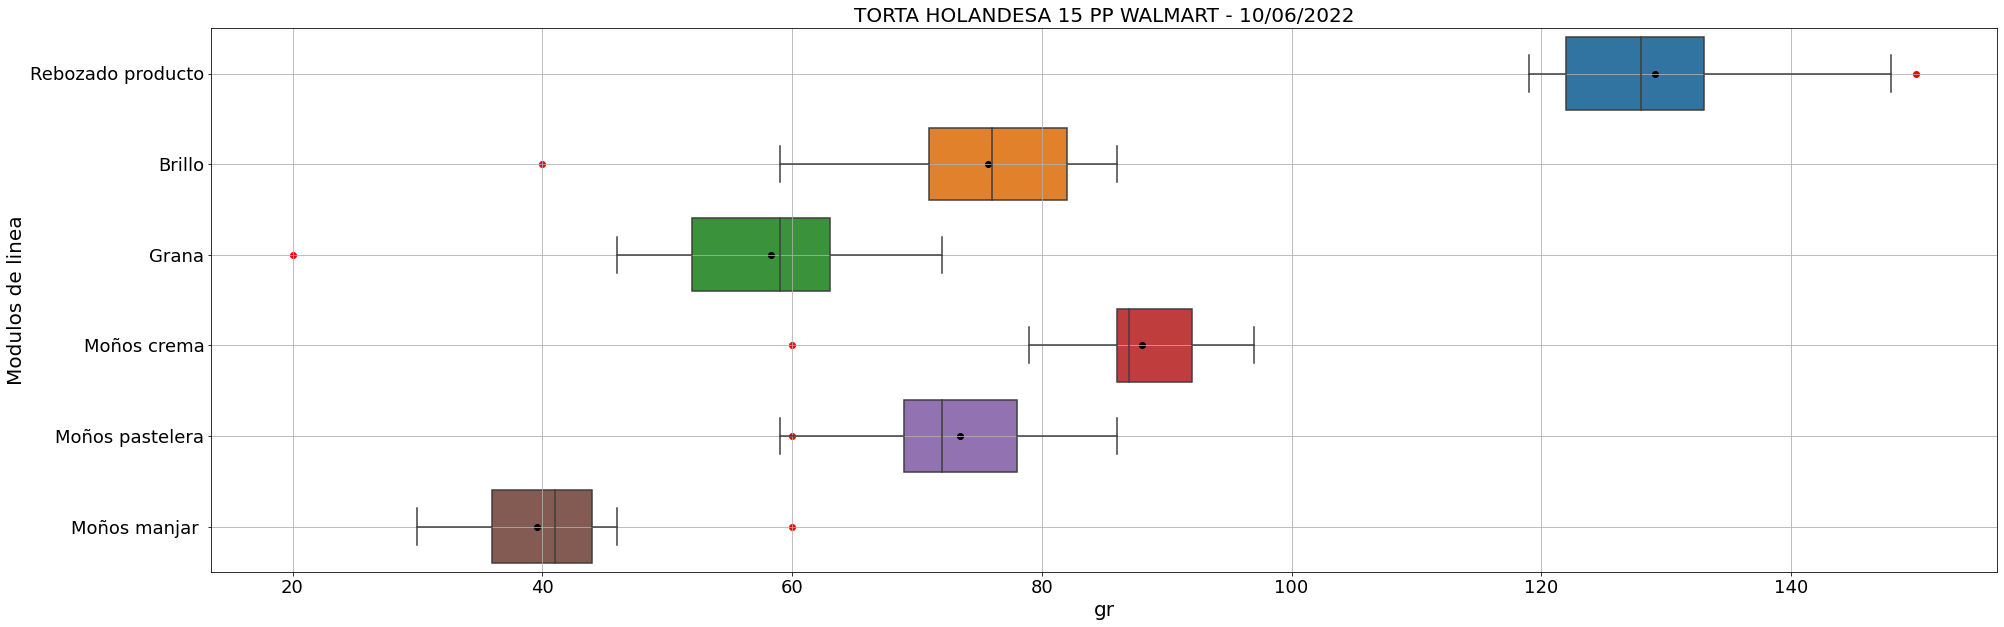

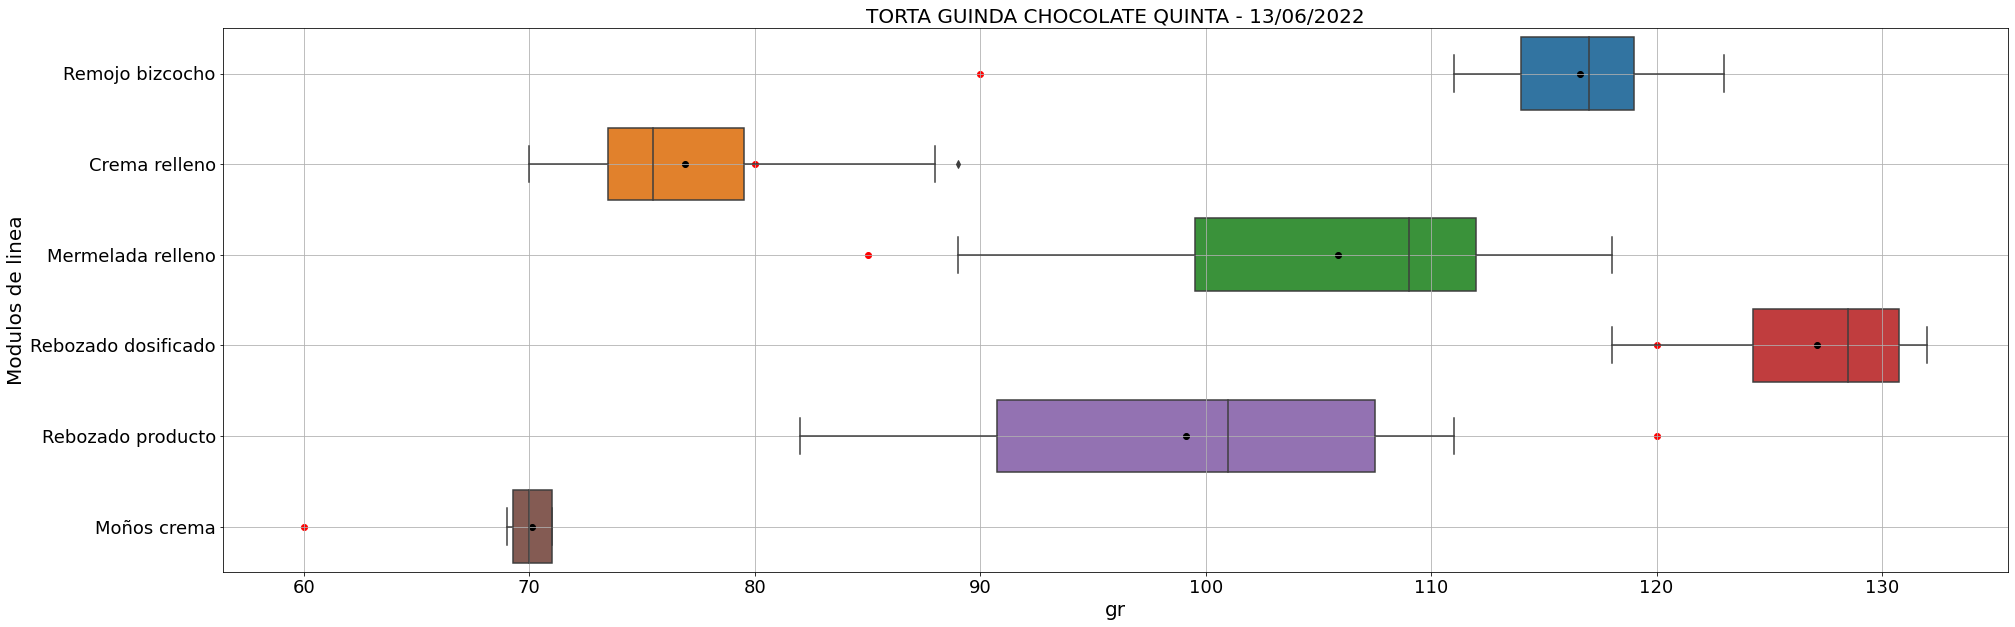

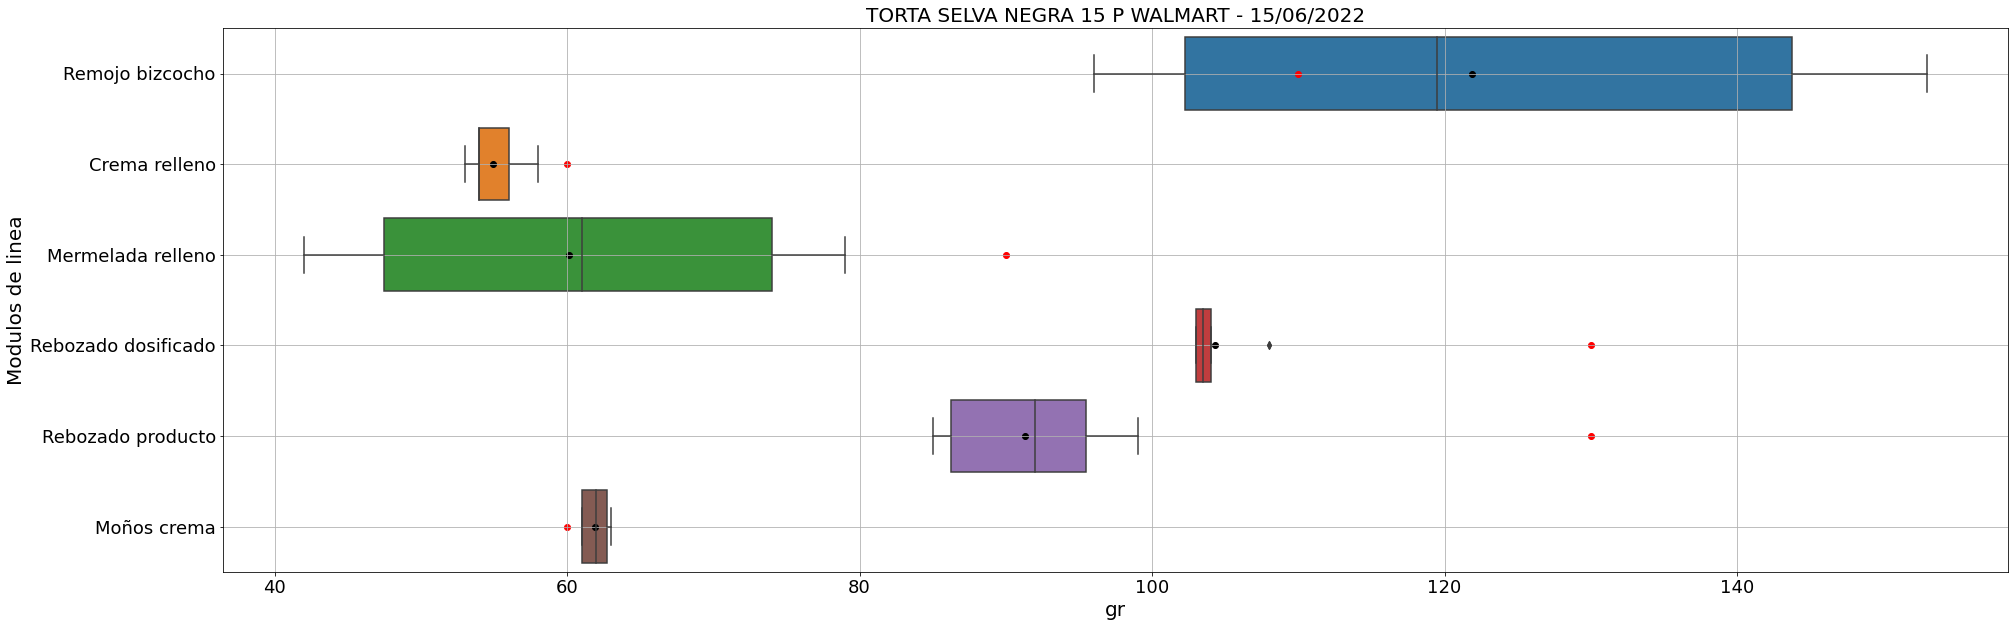

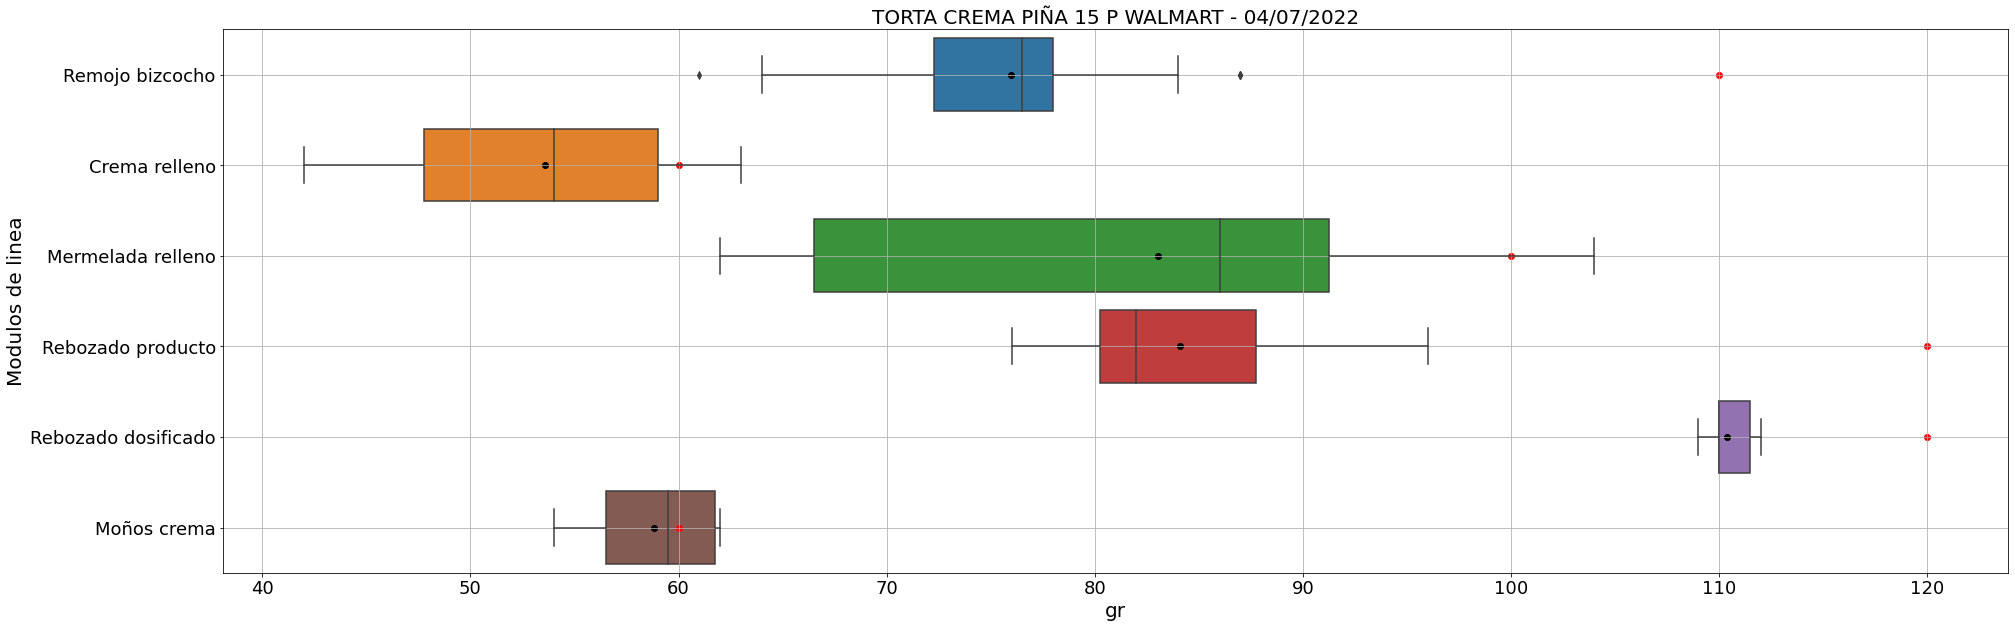

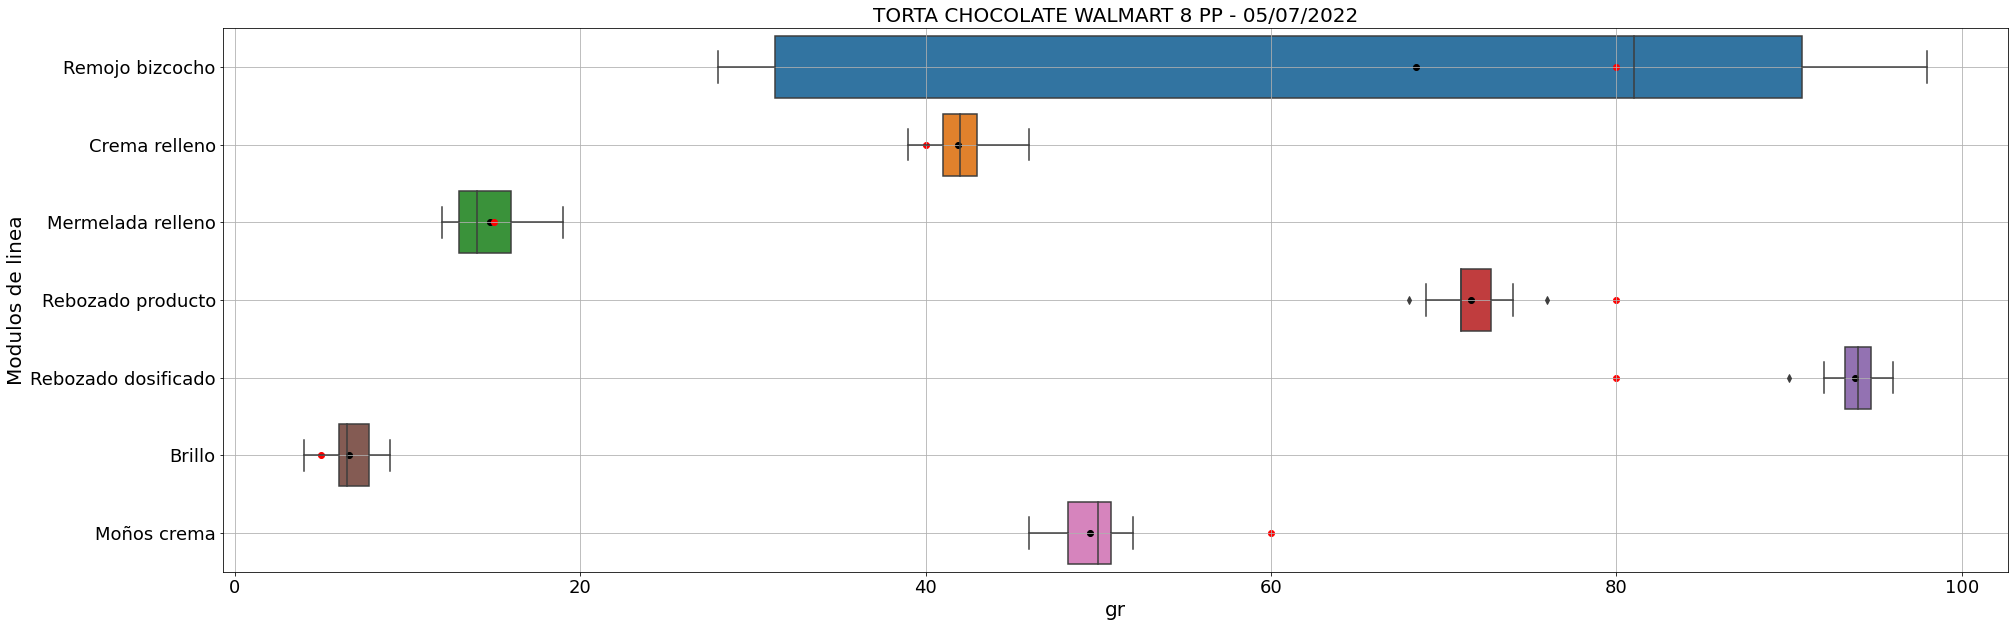

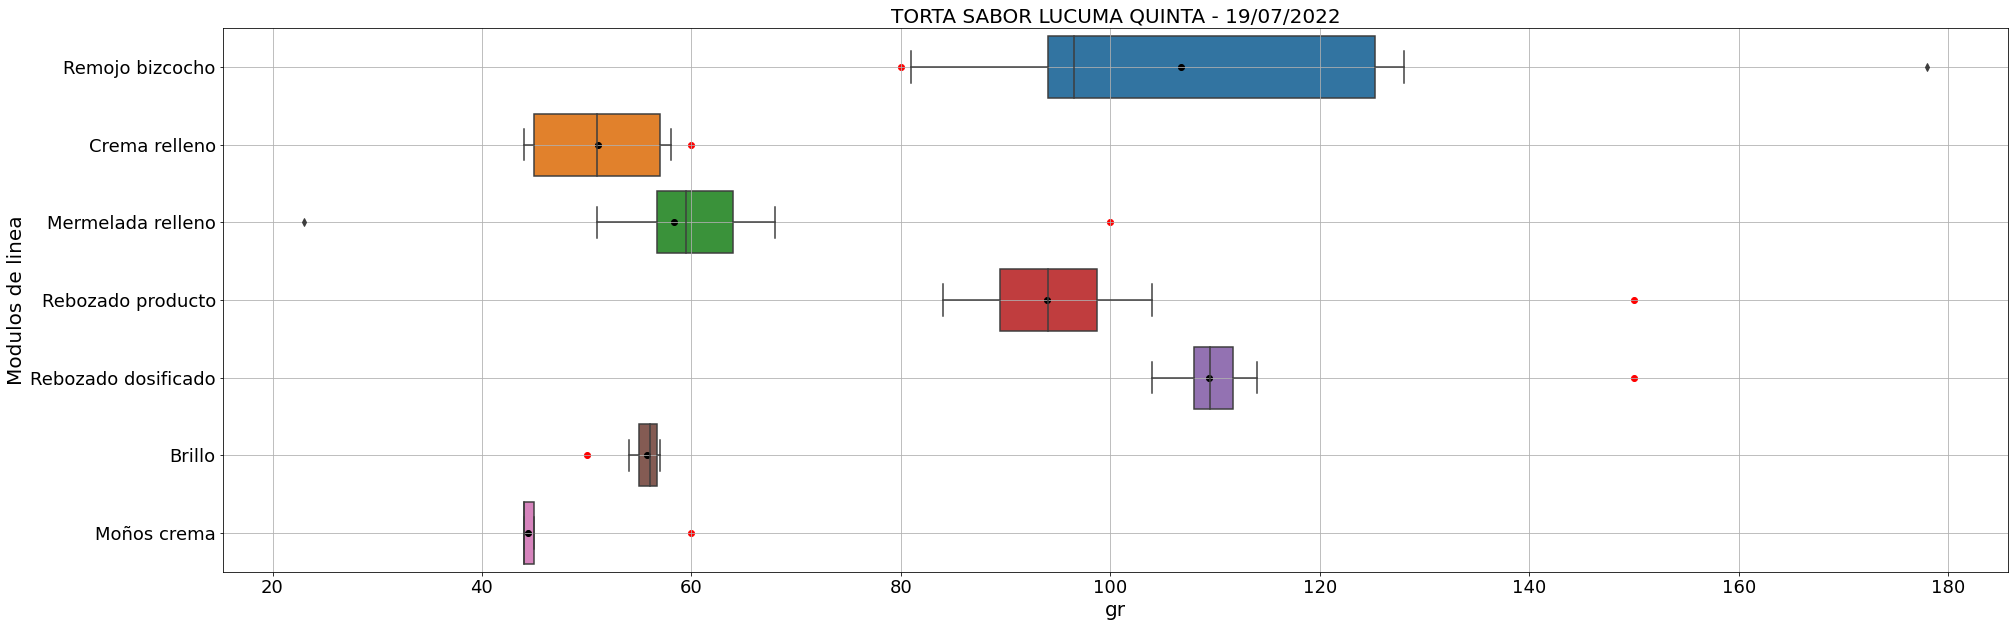

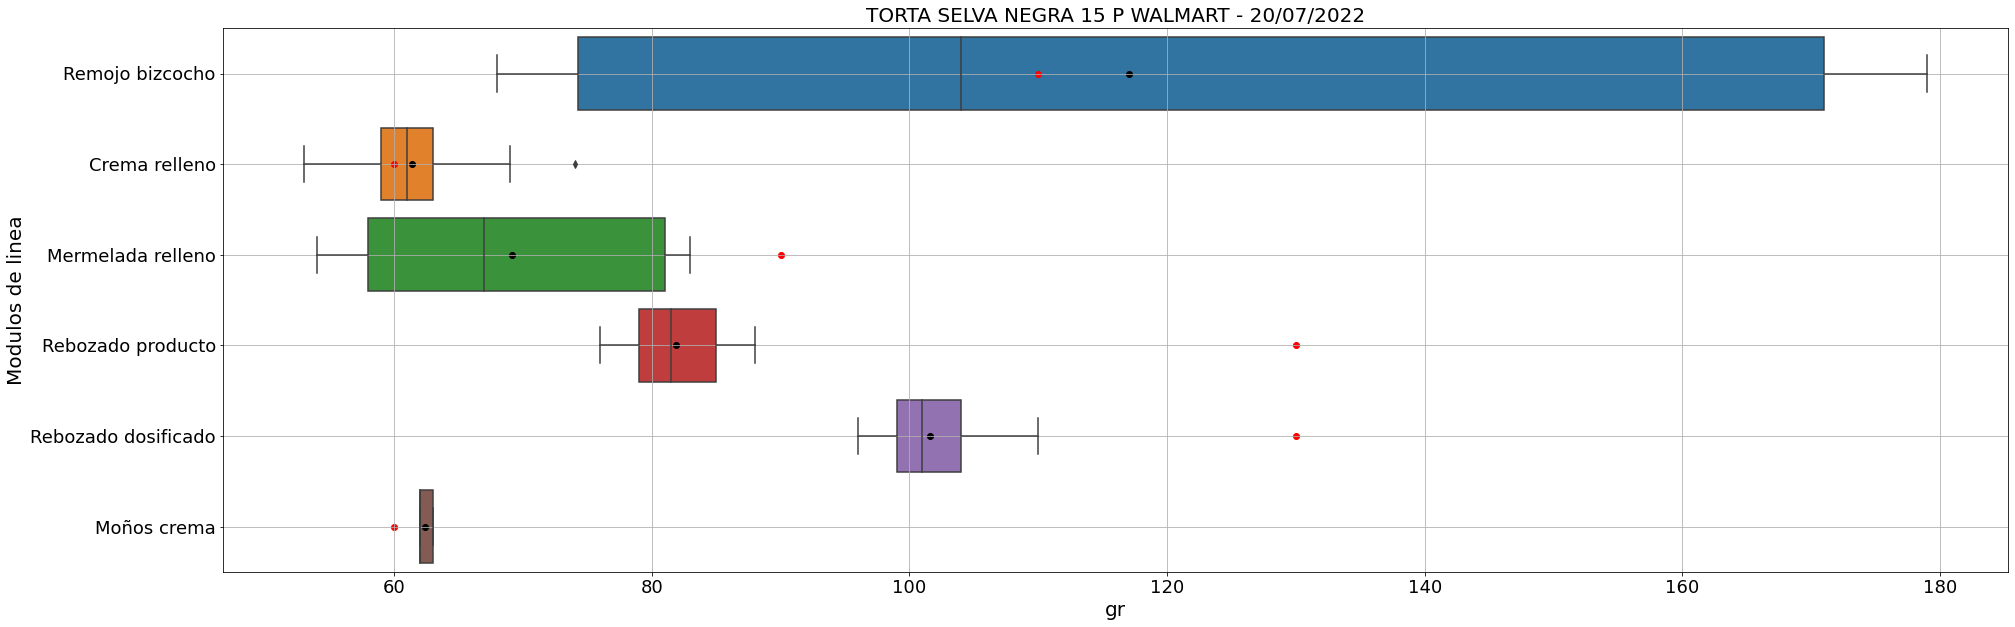

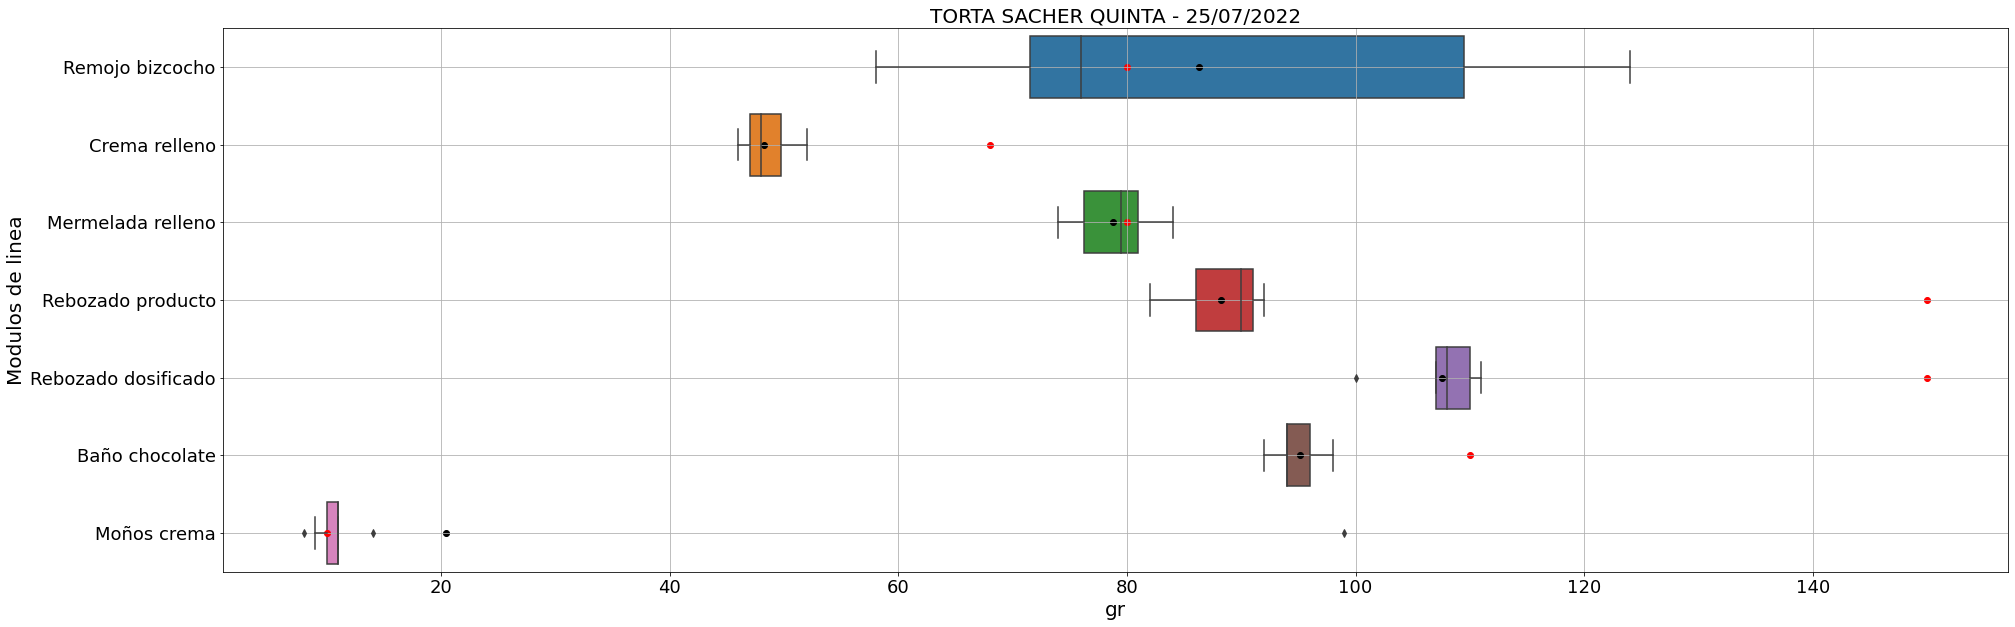

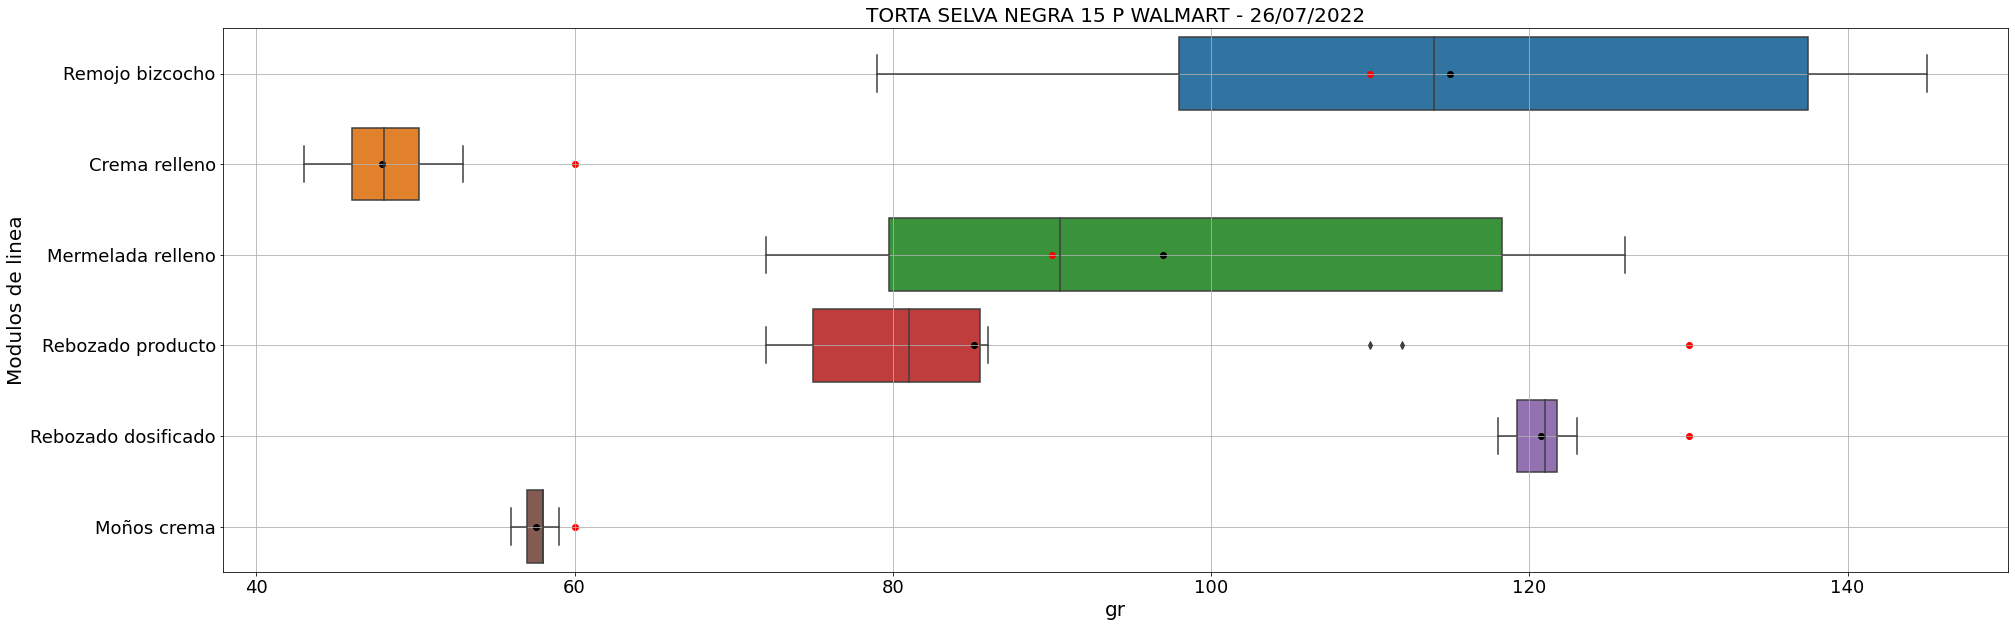

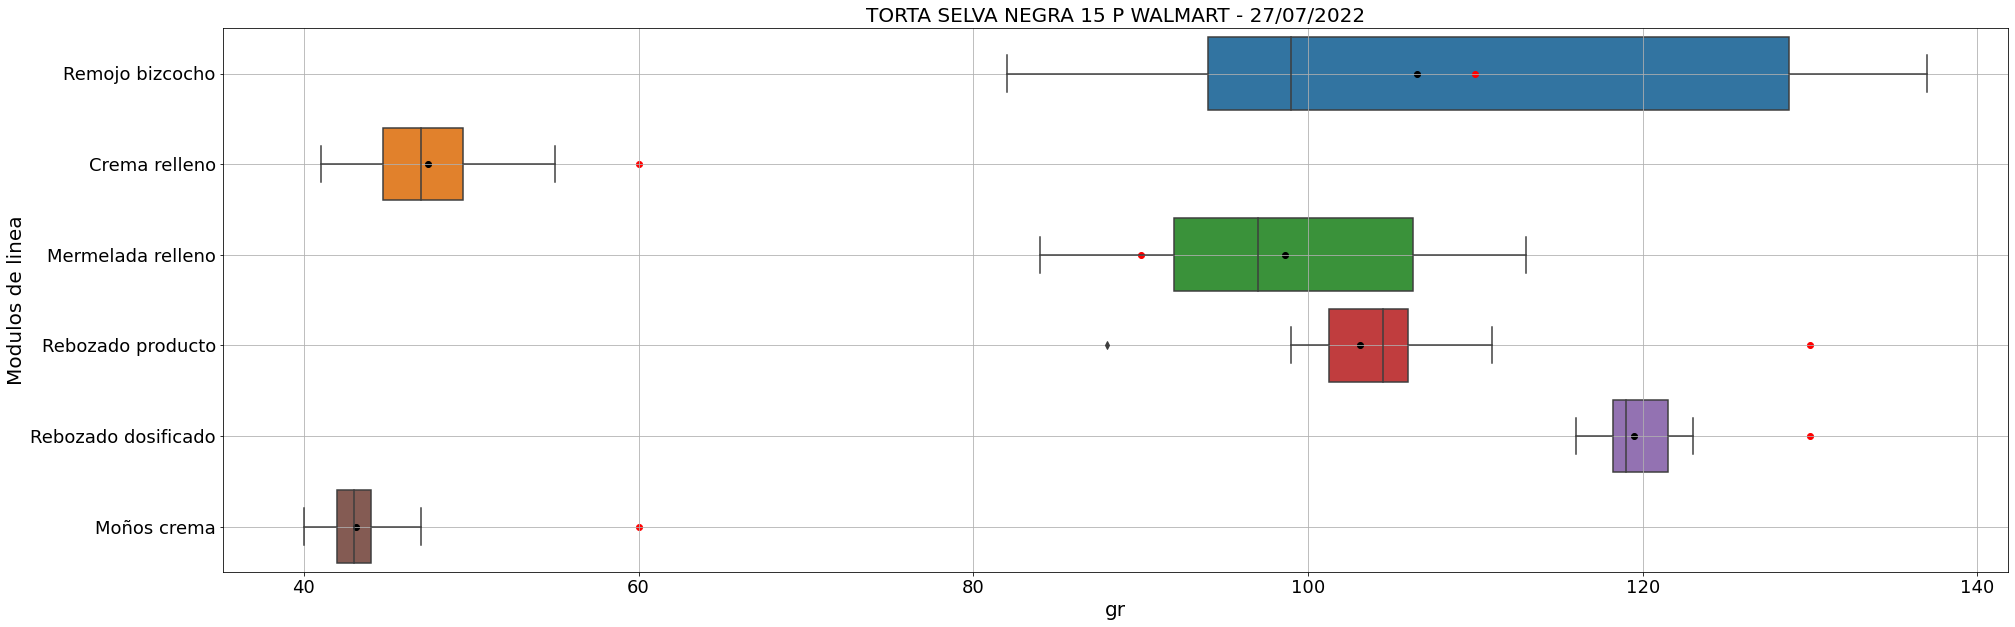

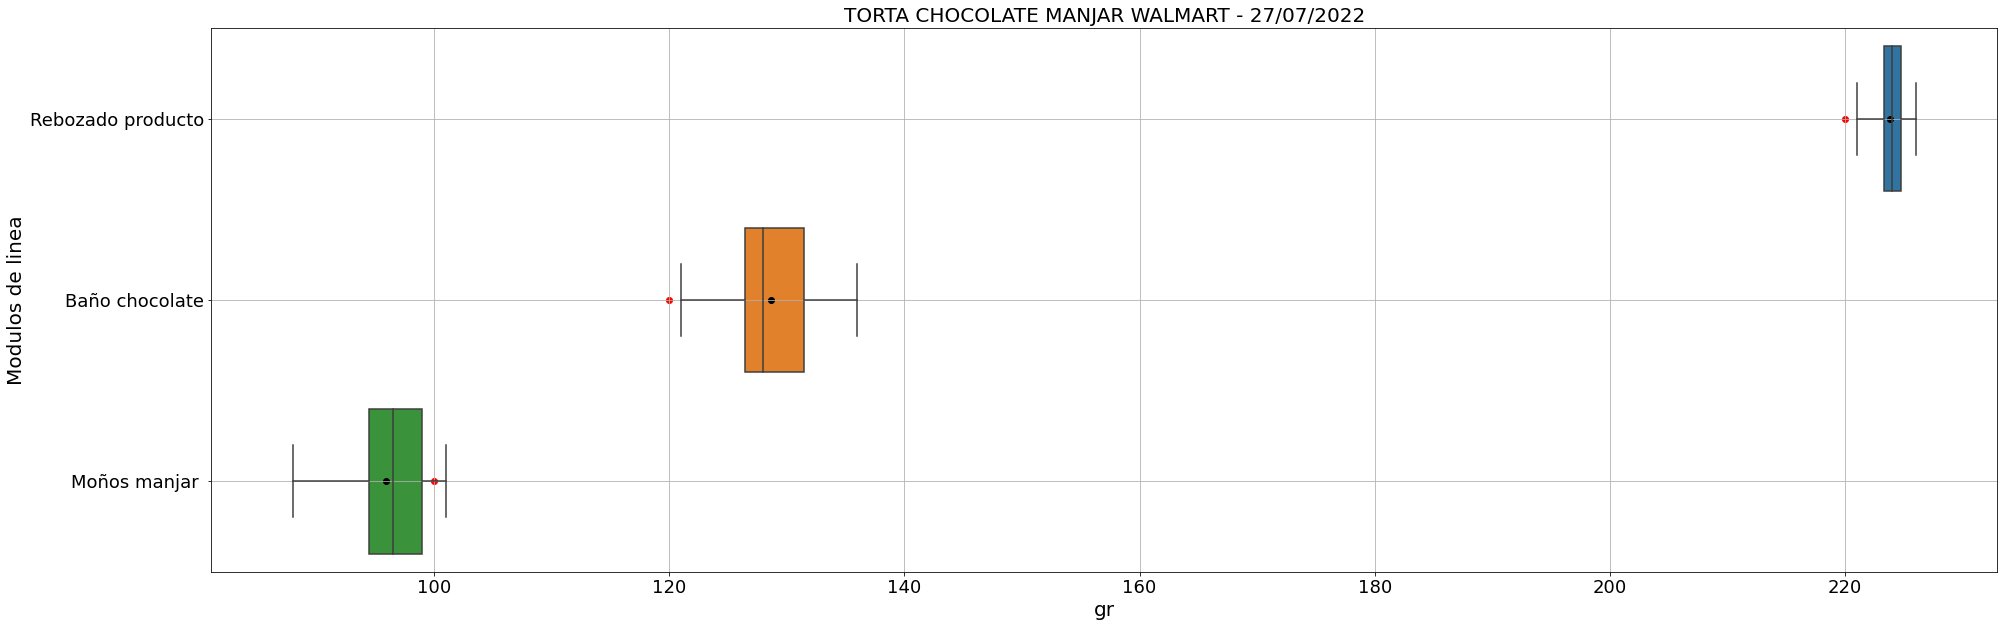

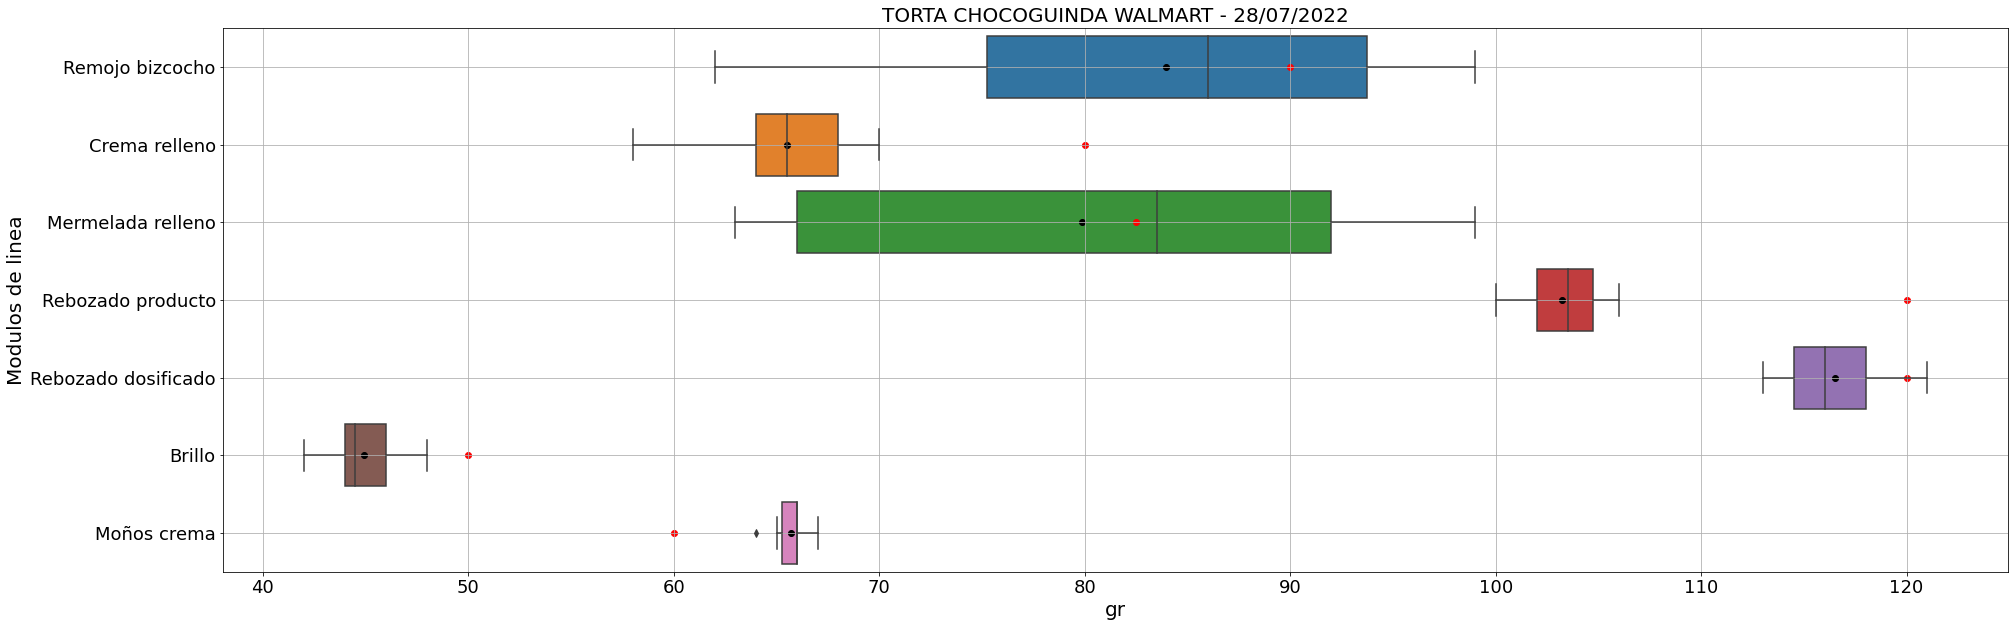

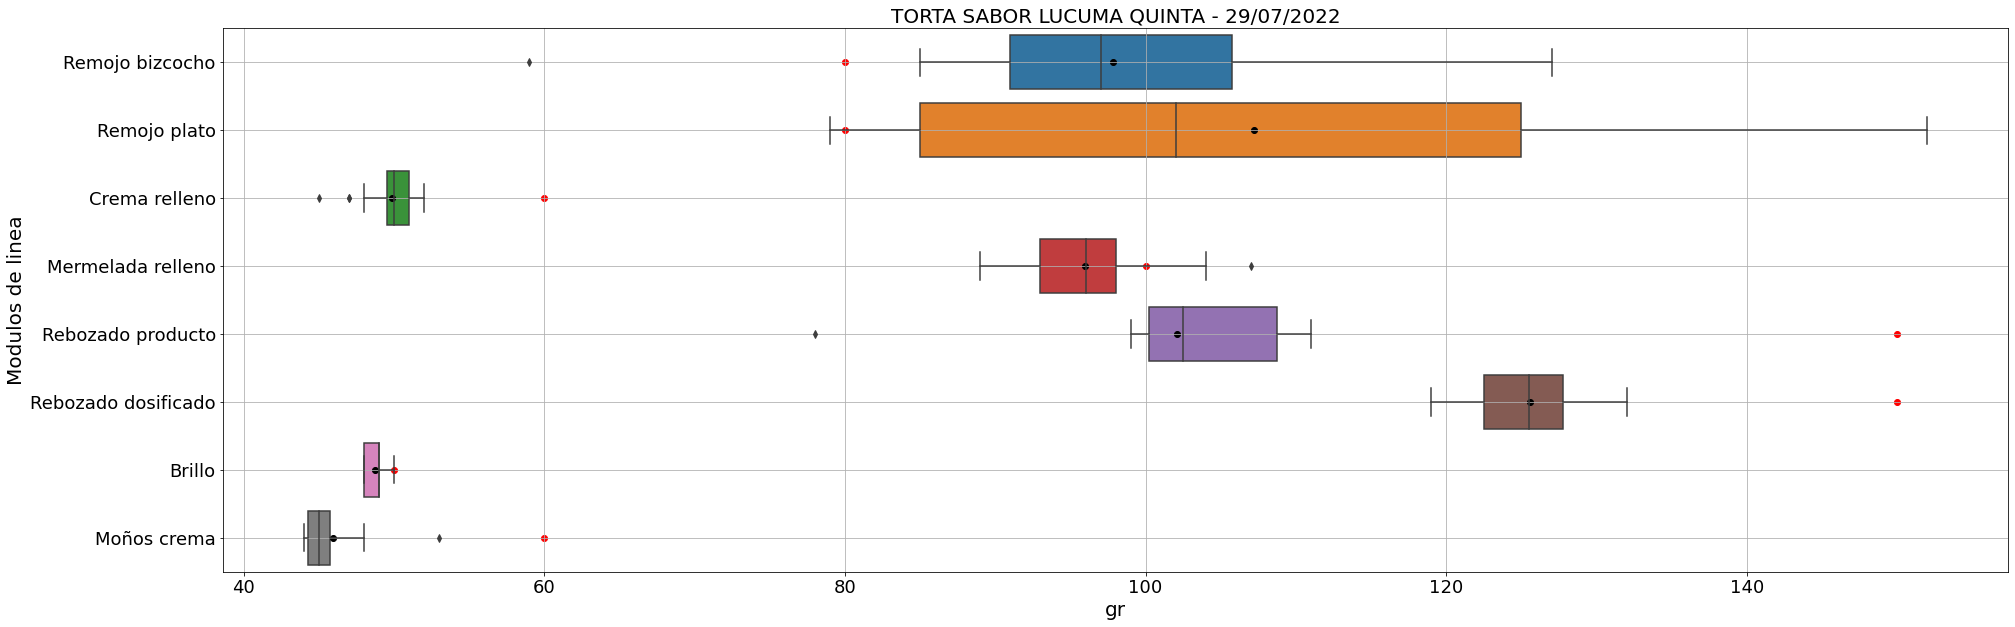

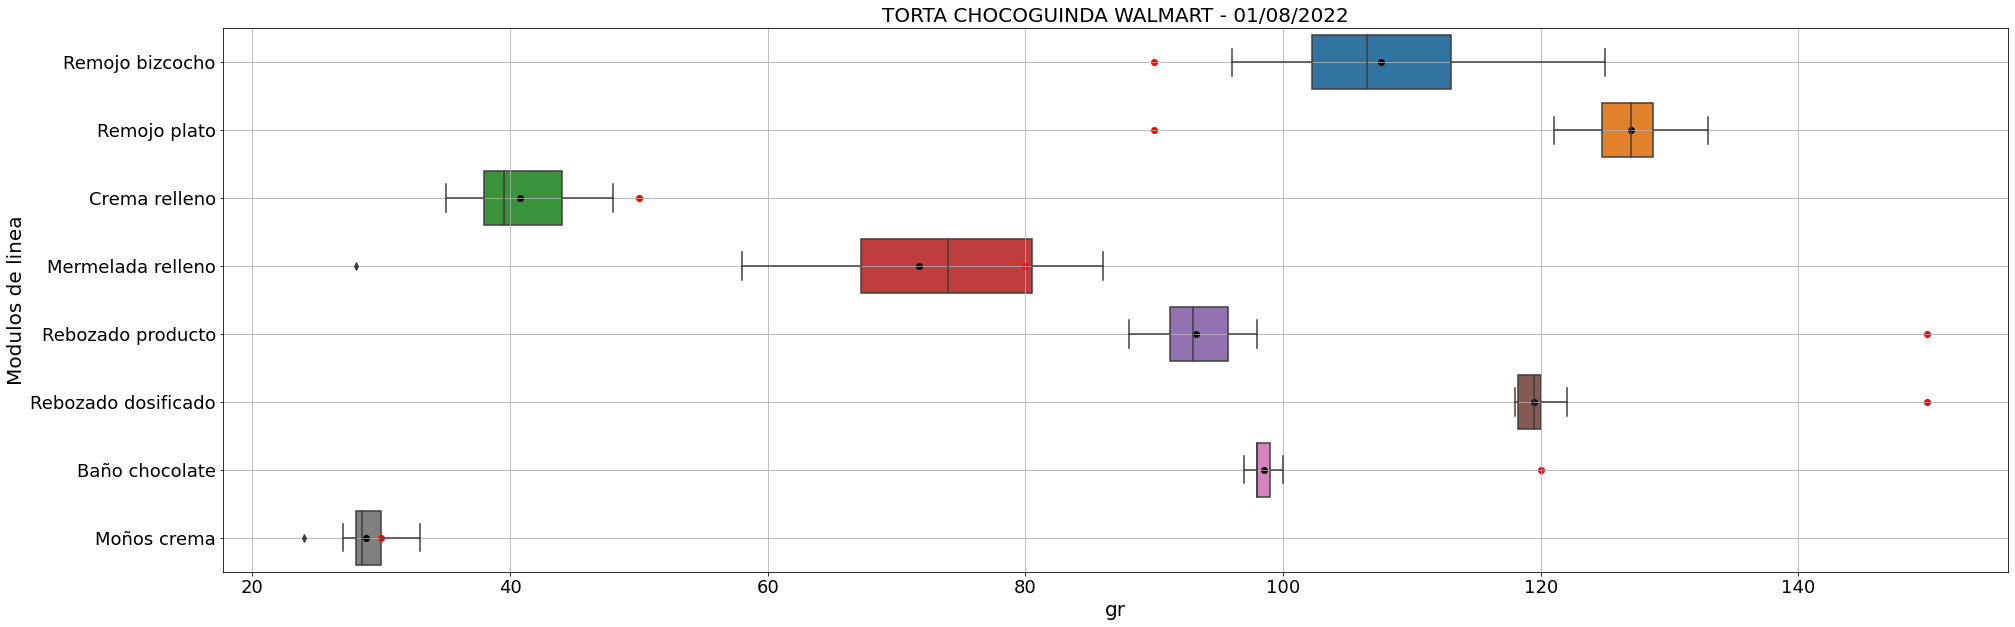

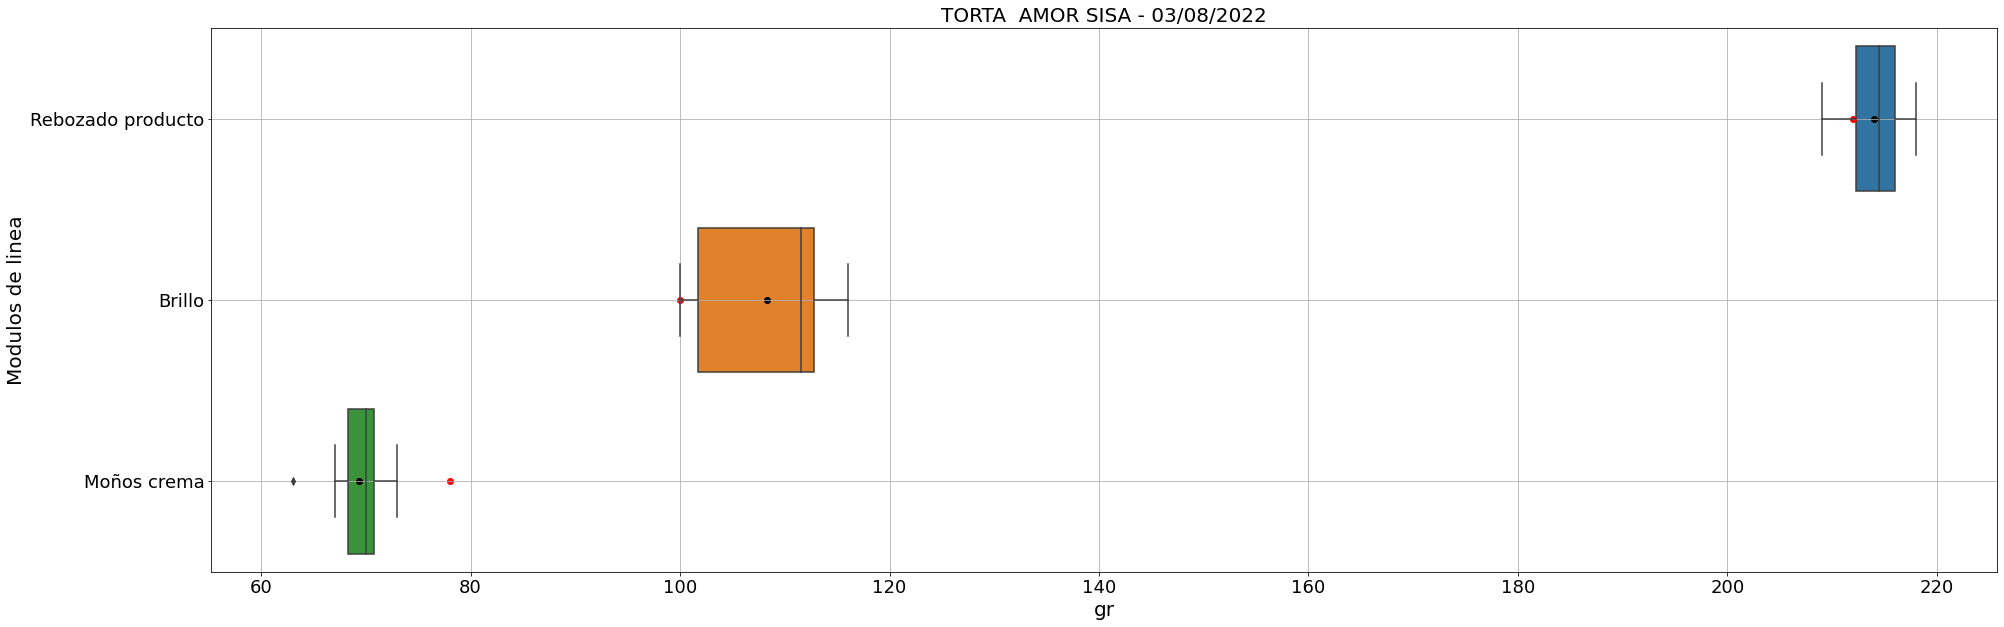

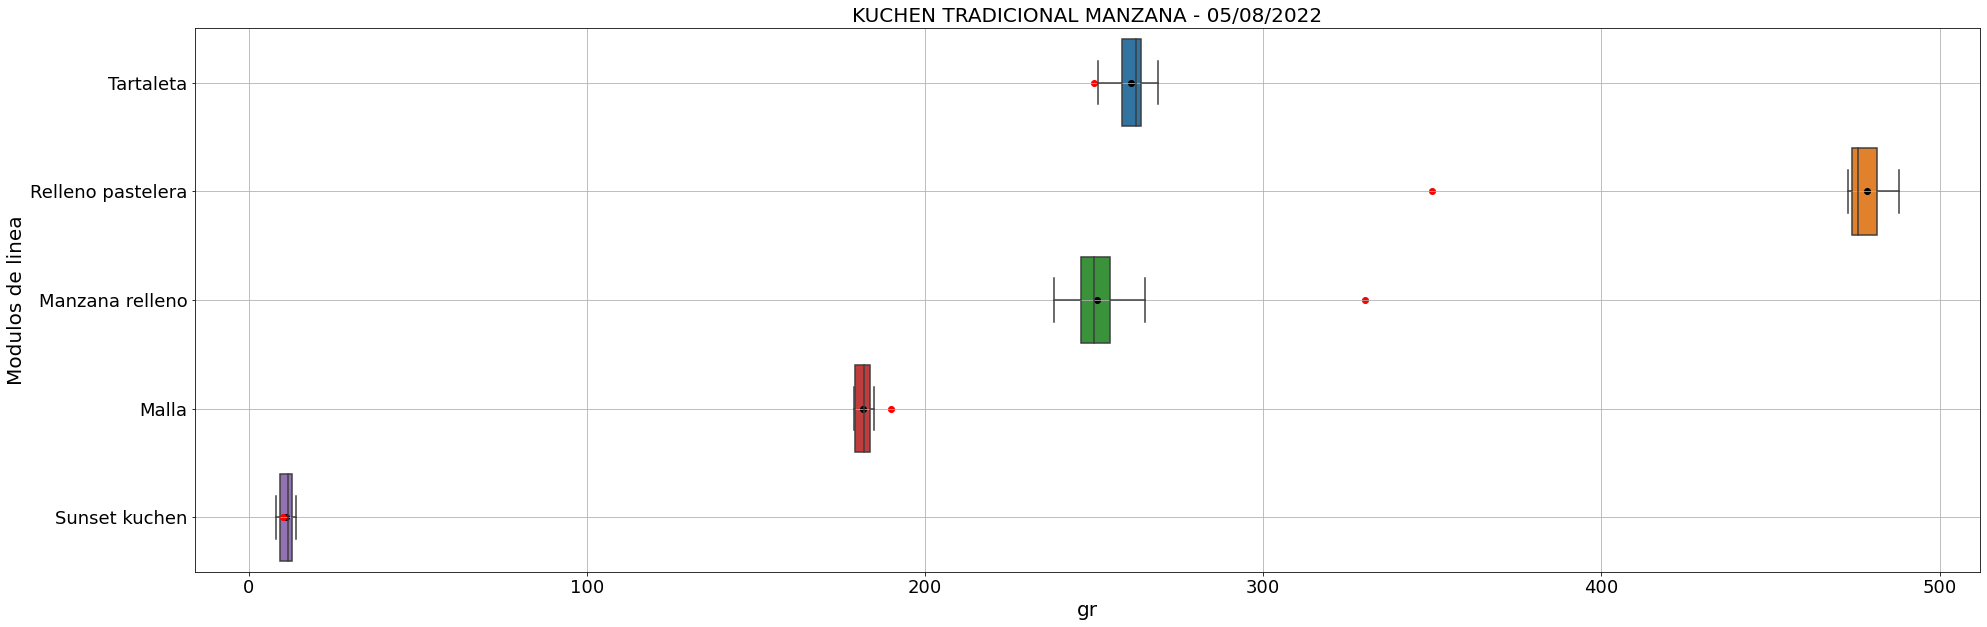

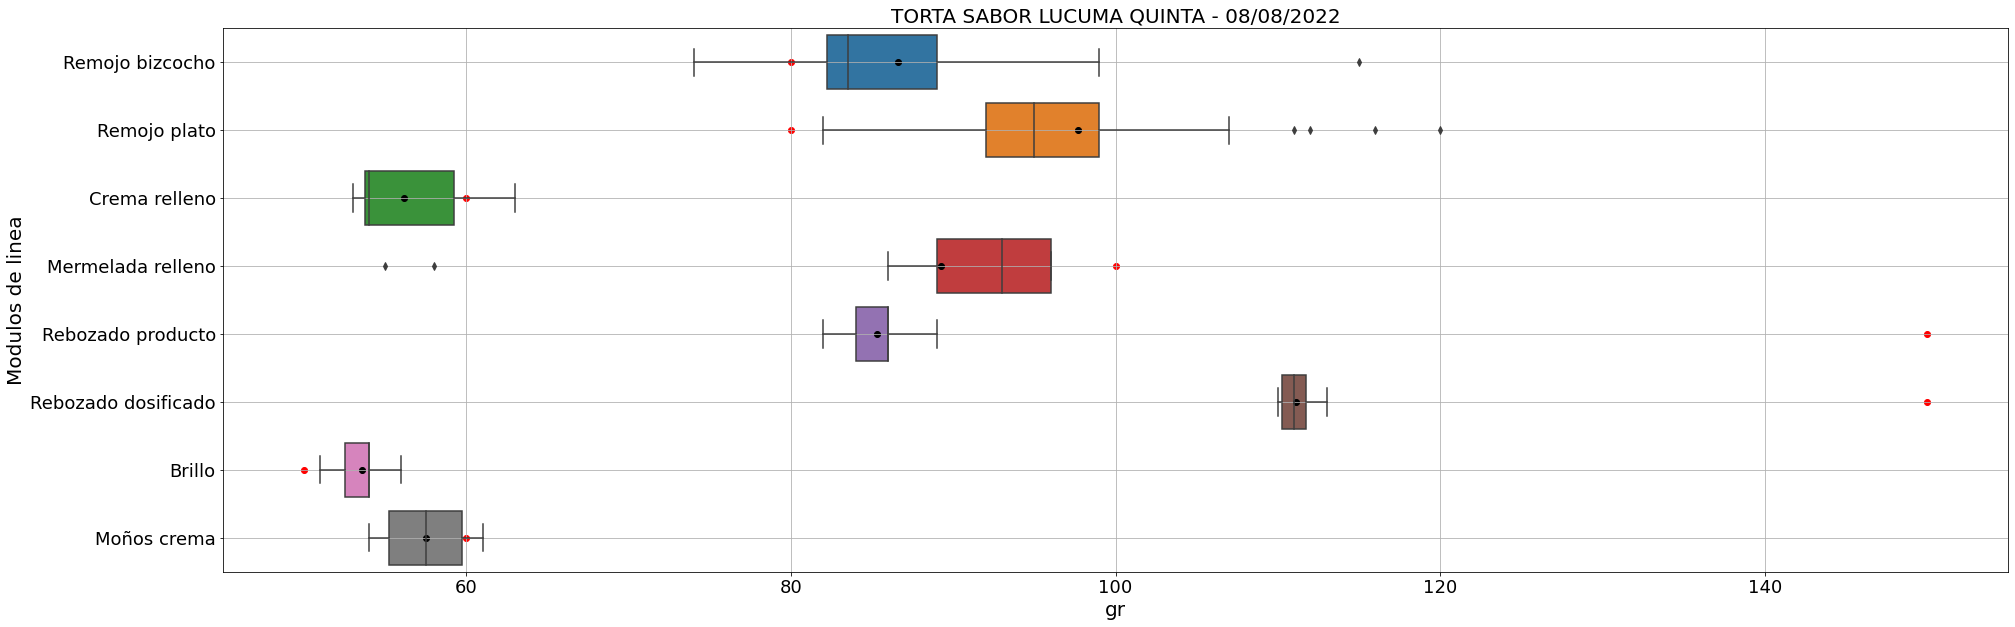

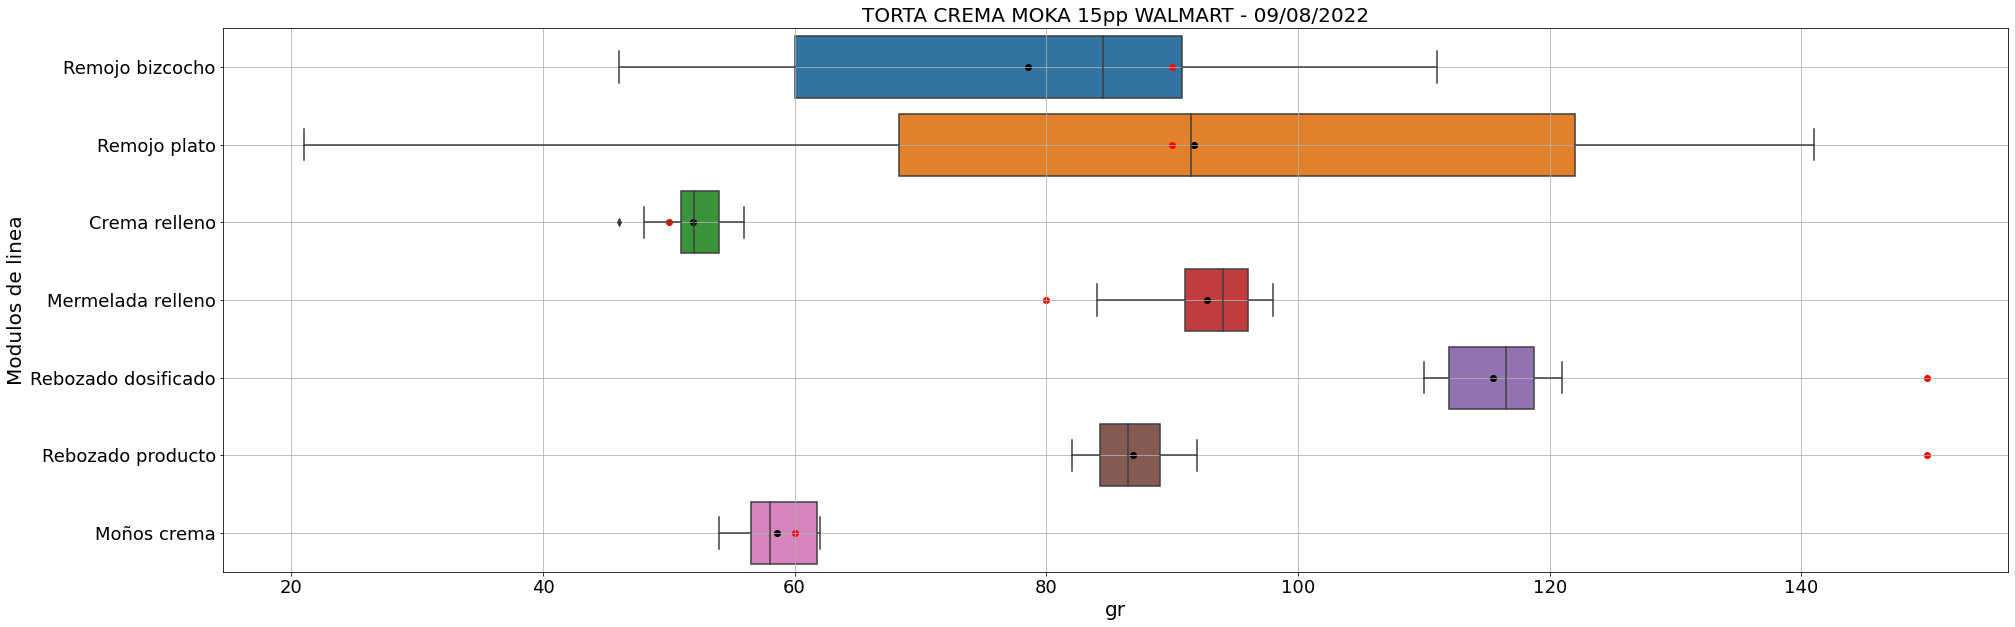

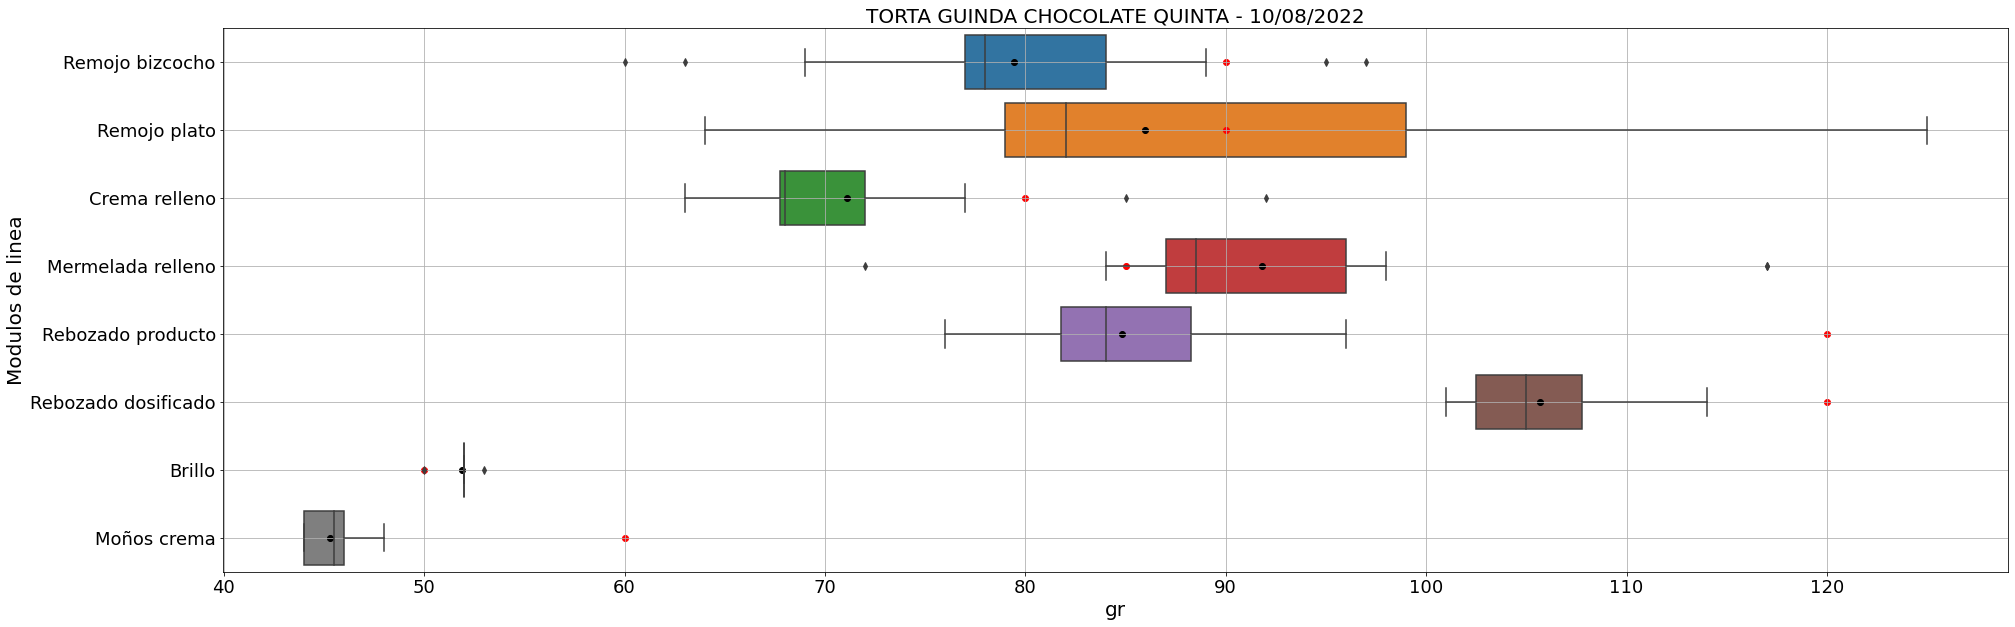

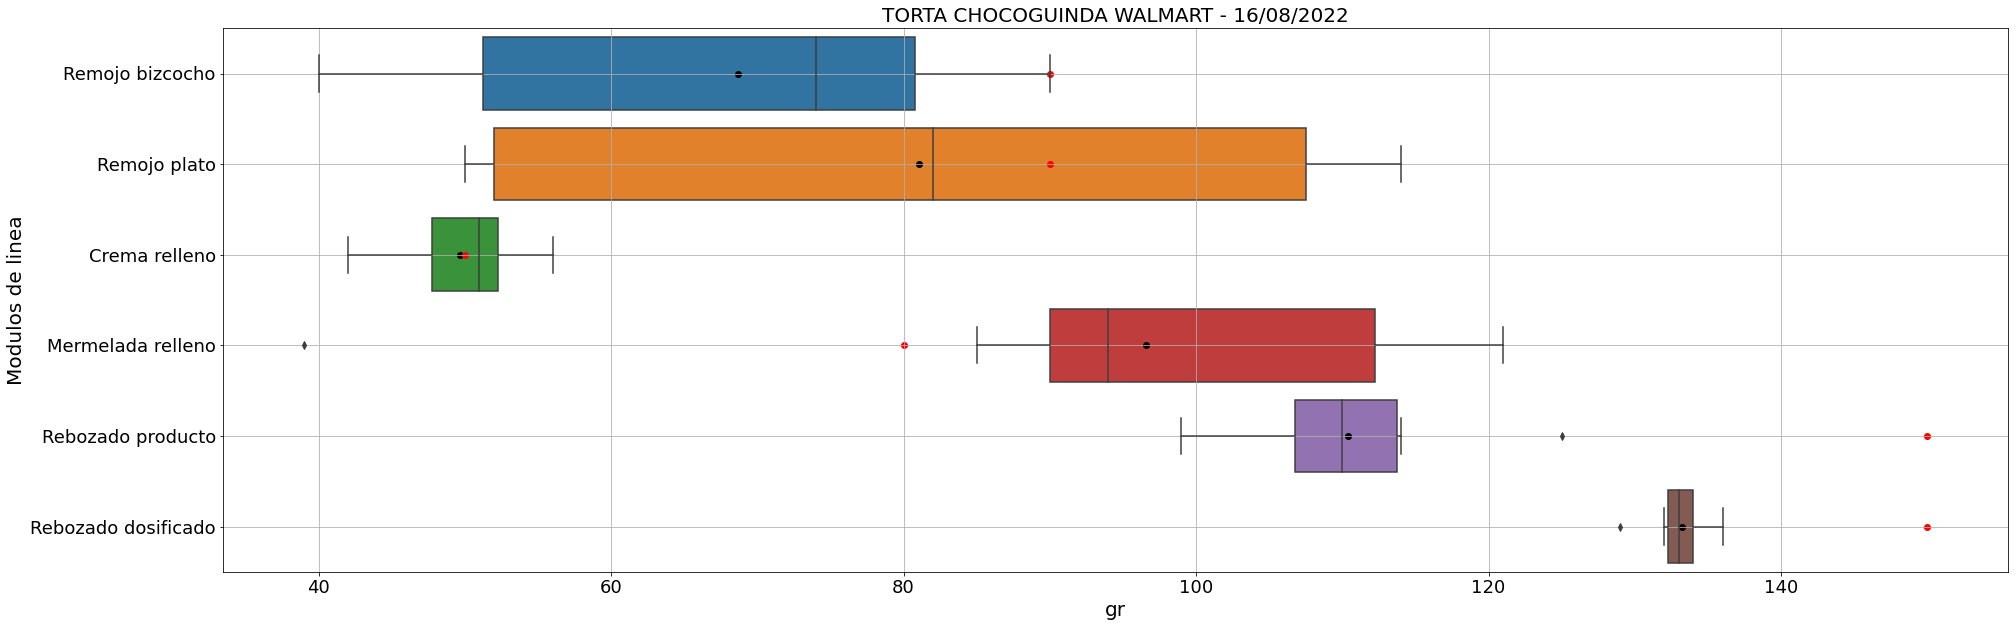

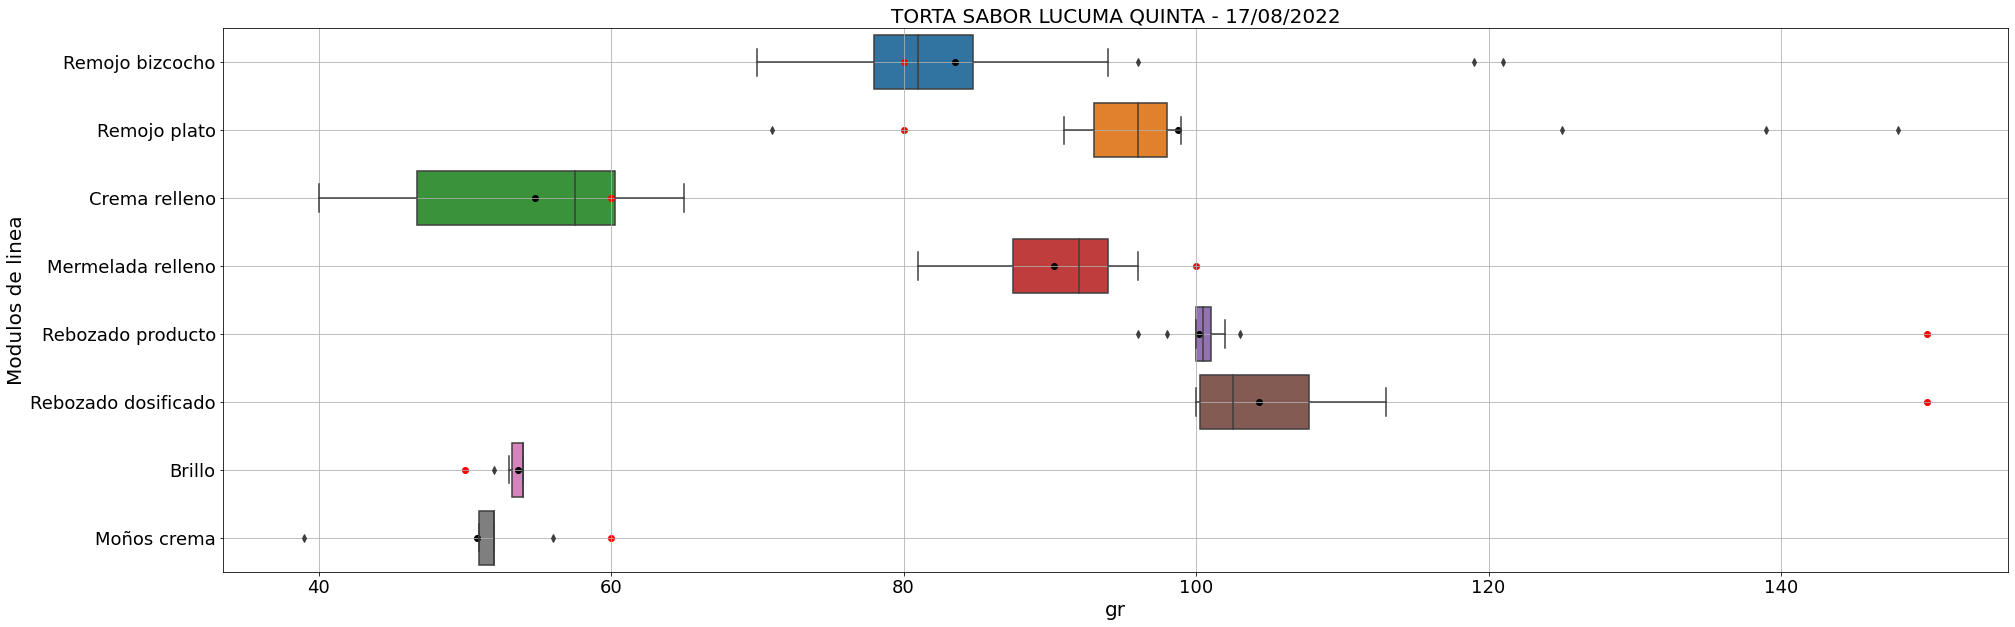

In [8]:
PT = df['PT y fecha'].drop_duplicates()
muestra = 1
for pt in PT:
    df2 = df[df['PT y fecha']==pt]
    fig, ax = plt.subplots(figsize=(32,10))
    sns.boxplot(data=df2,x='Muestra',y='Filtro') #Se cambia modulo de linea por filtro
    ax.grid()
    ax.set_title(pt,size=20)
    ax.set_xlabel('gr',size=20)
    ax.set_ylabel('Modulos de linea',size=20)
    ax.tick_params(axis='x',labelsize=18)
    ax.tick_params(axis='y',labelsize=18)
    df3 = df2['Filtro'].drop_duplicates() #Se cambia modulo de linea por filtro
    for ml in df3:
        df4 = df2[df2['Filtro']==ml] #Se cambia modulo de linea por filtro
        #x1 = ax.xaxis.convert_units(np.mean(df4['Muestra']))
        #x1 = np.mean(df4['Muestra'])
        ax.scatter(np.mean(df4['Muestra']),ml,c='k')
        ax.scatter(np.mean(df4['Receta']),ml,c='r')
    mus = 'Muestra'+str(muestra)
    muestra += 1
    os.chdir('c:\\Users\\dsaldias\\Desktop\\Sobreconsumo\\Veronica Sanchez\\Graficos')
    plt.savefig(str(mus)+'.jpg',format='jpg')